# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [1]:
import numpy as np
import os
#from scipy.misc import imread, imresize ## Higher version of scipi i have so deprecated so we will use PIL and cv2 
from matplotlib import pyplot as plt
from PIL import Image
import cv2
import datetime
import os
import pandas as pd
import math

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### Just have a hands-on on the Image Manipulation

#### With PIllow Library 

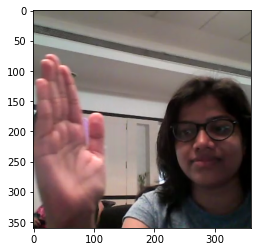

In [2]:
original_img = Image.open('Sample.png')
plt.imshow(original_img)

#### Rezise

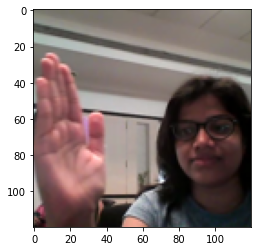

In [3]:
new_width = 120
new_height = 120

resize_img = original_img.resize((new_width, new_height))
plt.imshow(resize_img)

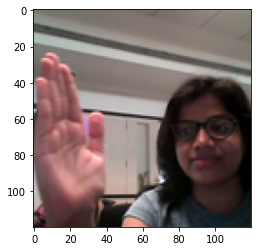

In [4]:
img1 = original_img.resize((new_width, new_height),Image.ANTIALIAS)
plt.imshow(img1)

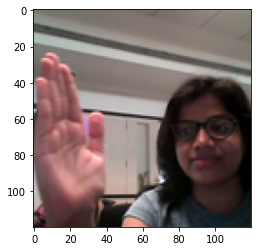

In [5]:
plt.imshow(img1, cmap = 'gray')

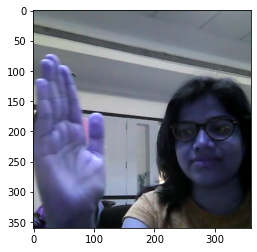

In [6]:
cv_original_image = cv2.imread('Sample.png')
plt.imshow(cv_original_image)

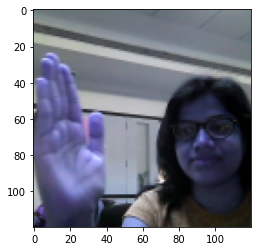

In [7]:
cv_resized_image = cv2.resize(cv_original_image,(new_width, new_height),interpolation=cv2.INTER_AREA)
plt.imshow(cv_resized_image)

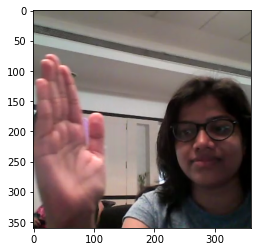

In [8]:
plt.imshow(original_img)

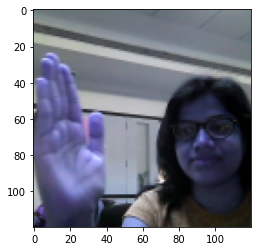

In [9]:
plt.imshow(cv_resized_image)

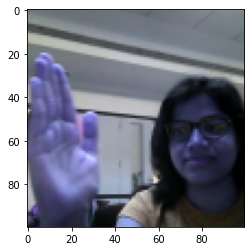

In [10]:
cv_resized_image = cv2.resize(cv_original_image, (100,100), interpolation = cv2.INTER_AREA)
plt.imshow(cv_resized_image)

We set the random seed so that the results don't vary drastically.

In [11]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [12]:
train_path = '/Users/monu/Masters/Gesture_Recognition/Project_Data/train'
val_path ='/Users/monu/Masters/Gesture_Recognition/Project_Data/val'
train_doc = np.random.permutation(open('/Users/monu/Masters/Gesture_Recognition/Project_Data/train.csv').readlines())
val_doc = np.random.permutation(open('/Users/monu/Masters/Gesture_Recognition/Project_Data//val.csv').readlines())
batch_size = 10 #experiment with the batch size


In [13]:
train_doc_df = pd.read_csv('/Users/monu/Masters/Gesture_Recognition/Project_Data/train.csv',sep=';')
val_doc_df = pd.read_csv('/Users/monu/Masters/Gesture_Recognition/Project_Data/val.csv',sep=';')

In [14]:
display(train_doc_df.head())
train_doc_df.shape

WIN_20180925_17_08_43_Pro_Left_Swipe_new  Left_Swipe_new  0
0  WIN_20180925_17_18_28_Pro_Left_Swipe_new  Left_Swipe_new  0
1  WIN_20180925_17_18_56_Pro_Left_Swipe_new  Left_Swipe_new  0
2  WIN_20180925_17_19_51_Pro_Left_Swipe_new  Left_Swipe_new  0
3  WIN_20180925_17_20_14_Pro_Left_Swipe_new  Left_Swipe_new  0
4  WIN_20180925_17_21_28_Pro_Left_Swipe_new  Left_Swipe_new  0

(662, 3)

In [15]:
display(val_doc_df.head())
val_doc_df.shape

WIN_20180925_17_17_04_Pro_Left_Swipe_new  Left_Swipe_new  0
0  WIN_20180925_17_43_01_Pro_Left_Swipe_new  Left_Swipe_new  0
1  WIN_20180925_18_01_40_Pro_Left_Swipe_new  Left_Swipe_new  0
2  WIN_20180925_18_03_21_Pro_Left_Swipe_new  Left_Swipe_new  0
3  WIN_20180926_16_46_22_Pro_Left_Swipe_new  Left_Swipe_new  0
4  WIN_20180926_16_47_09_Pro_Left_Swipe_new  Left_Swipe_new  0

(99, 3)

In [16]:
!pwd
!ls -ls "/Users/monu/Masters/Gesture_Recognition/Project_Data/train/WIN_20180907_16_02_38_Pro_Right Swipe_new"

/Users/monu/Masters/Gesture_Recognition
ls: /Users/monu/Masters/Gesture_Recognition/Project_Data/train/WIN_20180907_16_02_38_Pro_Right Swipe_new: No such file or directory


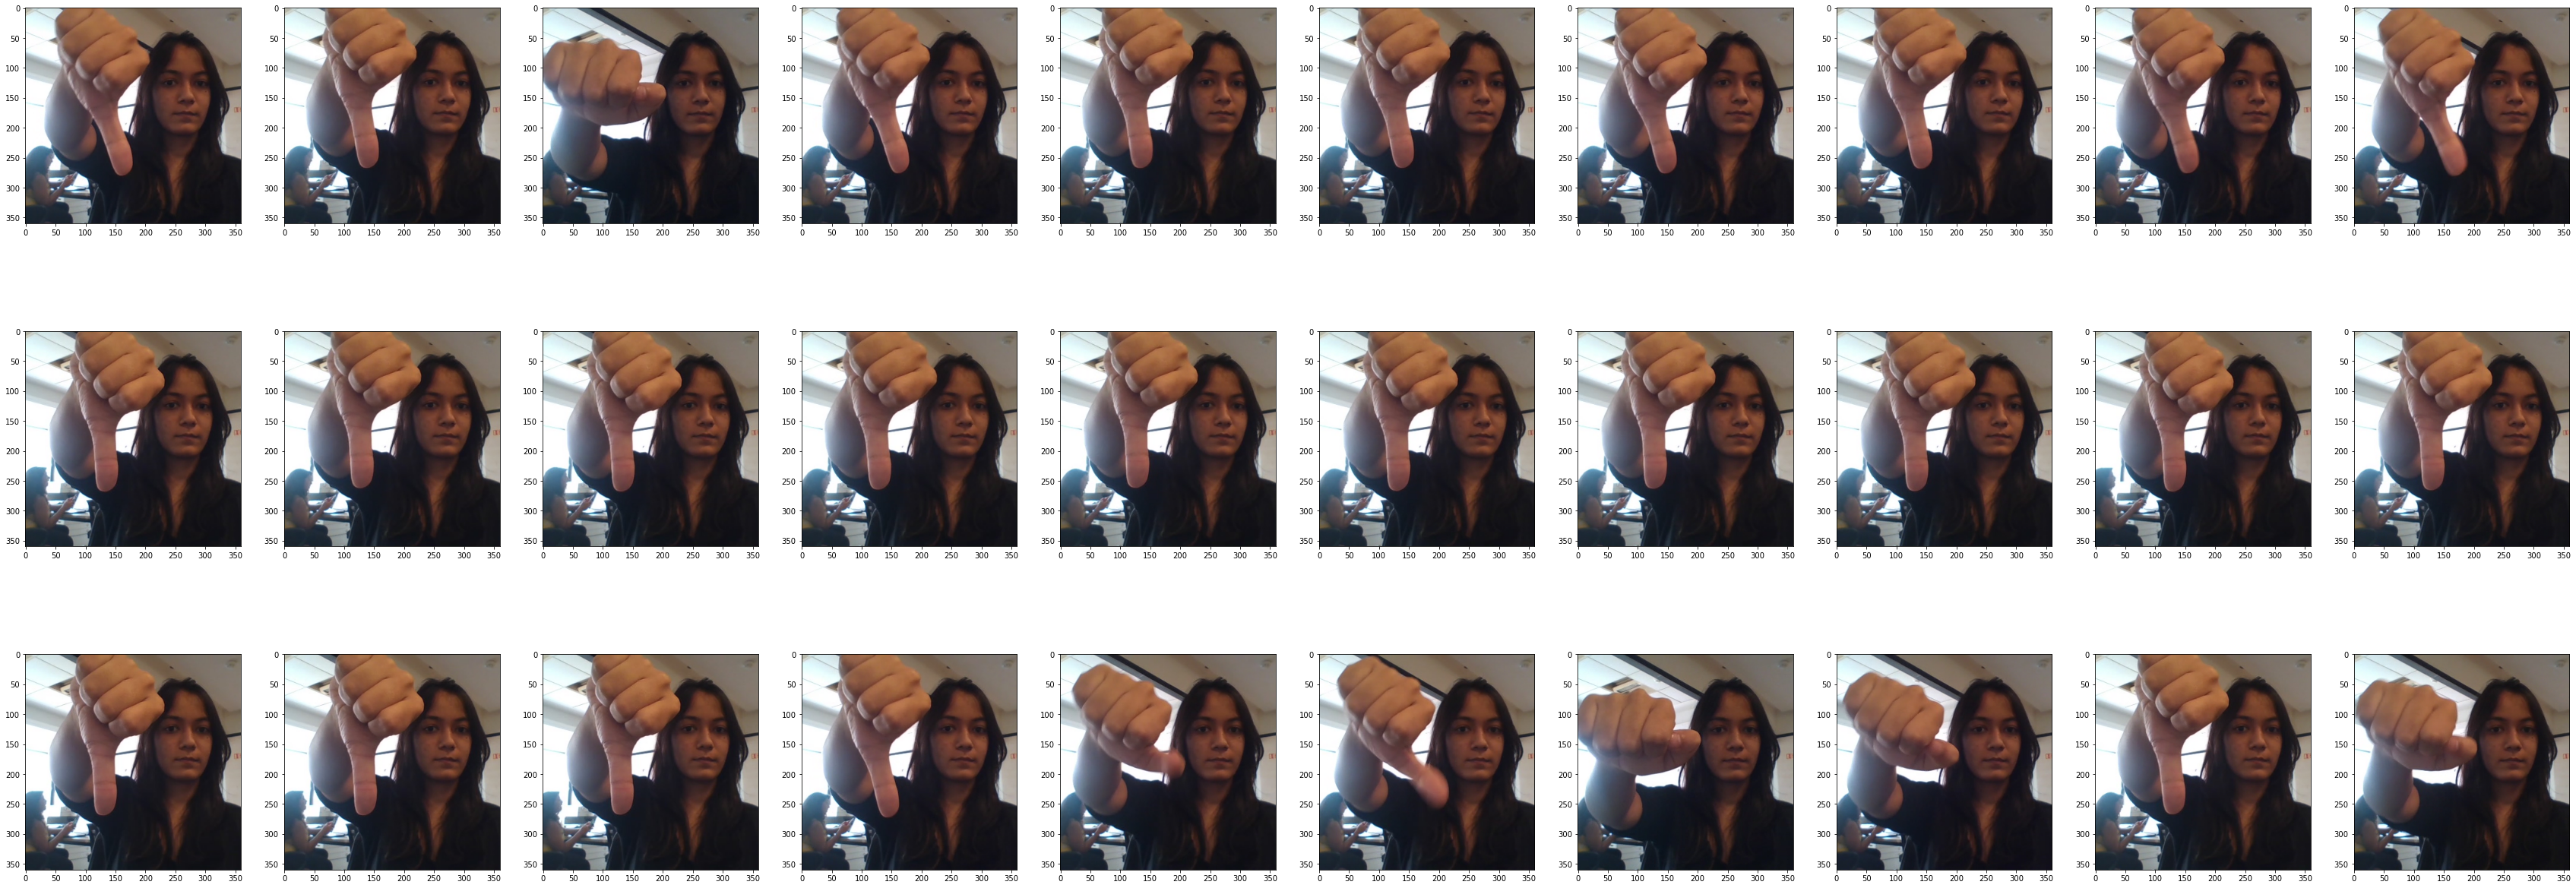

In [17]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('Project_data/train/WIN_20180907_15_44_32_Pro_Thumbs Down_new/*'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(60,30))
columns = 10
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.imshow(image)

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [18]:
def generator(source_path, folder_list, batch_size,no_of_frames=15,dim_y=128,dim_z=128,verify=False,normalize='normal'):
    print( 'Source path = ', source_path, '; batch size =', batch_size)

    #dim_y = 128 #(y,z) is the final size of the input images and 3 is the number of channels RGB
    #dim_z = 128 #(y,z) is the final size of the input images and 3 is the number of channels RGB
    img_idx = [x for x in range(0, no_of_frames)] #x is the number of images you use for each video
    while True:
        t = np.random.permutation(folder_list)
        num_batches = math.floor(len(folder_list)//batch_size) # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,no_of_frames,dim_y,dim_z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                if verify:
                    plt.figure(figsize=(no_of_frames,5))
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    if verify:
                        plt.subplot(2, no_of_frames, idx+1)
                        plt.imshow(image.astype('uint8'))
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    # Cropping non symmetric frames
                    if image.shape[0] != image.shape[1]:
                        image=image[0:120,20:140]
                        
                    # Resizing the image
                    image = cv2.resize(image, (dim_y, dim_z), interpolation=cv2.INTER_AREA)
                    if verify:
                        plt.subplot(2, no_of_frames, idx+no_of_frames +1 )
                        plt.imshow(image.astype('uint8'))
                    batch_data[folder,idx,:,:,0] = image[:,:,0] - np.percentile(image[:,:,0],5) / (np.percentile(image[:,:,0],95) - np.percentile(image[:,:,0],5)) #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = image[:,:,1] - np.percentile(image[:,:,1],5) / (np.percentile(image[:,:,1],95) - np.percentile(image[:,:,0],5)) #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = image[:,:,2] - np.percentile(image[:,:,2],5) / (np.percentile(image[:,:,2],95) - np.percentile(image[:,:,0],5)) #normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        
        # write the code for the remaining data points which are left after full batches
        #Code for remaining values in batch
        total_folder_processed = num_batches * batch_size # Finding total images procees
        remaining_batch_size = len(folder_list) -  total_folder_processed # finding remaining images to process
        batch_data = np.zeros((remaining_batch_size,no_of_frames,dim_y,dim_z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
        batch_labels = np.zeros((remaining_batch_size,5)) # batch_labels is the one hot representation of the output
            
        for folder in range(remaining_batch_size): # iterate over remaining images
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*remaining_batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate over the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*remaining_batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    # Cropping non symmetric frames
                    if image.shape[0] != image.shape[1]:
                        image=image[0:120,20:140]
                        
                    # Resizing the image
                    resized_im = cv2.resize(image, (dim_y, dim_z), interpolation=cv2.INTER_AREA)
                    if verify:
                        plt.subplot(2, no_of_frames, idx+no_of_frames +1)
                        plt.imshow(image.astype('uint8'))

                    batch_data[folder,idx,:,:,0] = resized_im[:,:,0] - np.percentile(resized_im[:,:,0],5) / (np.percentile(resized_im[:,:,0],95) - np.percentile(resized_im[:,:,0],5)) #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = resized_im[:,:,1] - np.percentile(resized_im[:,:,1],5) / (np.percentile(resized_im[:,:,1],95) - np.percentile(resized_im[:,:,0],5)) #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = resized_im[:,:,2] - np.percentile(resized_im[:,:,2],5) / (np.percentile(resized_im[:,:,2],95) - np.percentile(resized_im[:,:,0],5)) #normalise and feed in the image
                   

                batch_labels[folder, int(t[folder + (batch*remaining_batch_size)].strip().split(';')[2])] = 1
        yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

In [19]:
curr_dt_time = datetime.datetime.now()
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 30 # choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 30


In [20]:
data = generator(train_path, train_doc, batch_size,verify=True)

Source path =  /Users/monu/Masters/Gesture_Recognition/Project_Data/train ; batch size = 10


(array([[[[[ 1.27907257e+02,  1.32895050e+02,  1.18869667e+02],
           [ 1.26973923e+02,  1.31961716e+02,  1.17002998e+02],
           [ 1.25173927e+02,  1.29295044e+02,  1.15136330e+02],
           ...,
           [ 1.04507256e+02,  1.11361717e+02,  9.69363327e+01],
           [ 1.01773918e+02,  1.07828384e+02,  9.06030045e+01],
           [ 9.99072571e+01,  1.06895050e+02,  8.68696671e+01]],
 
          [[ 1.26973923e+02,  1.31961716e+02,  1.17002998e+02],
           [ 1.26911697e+02,  1.31899490e+02,  1.16878555e+02],
           [ 1.25982819e+02,  1.30912827e+02,  1.15945221e+02],
           ...,
           [ 1.05565041e+02,  1.13103943e+02,  9.78696671e+01],
           [ 1.03640587e+02,  1.08823944e+02,  9.16607819e+01],
           [ 1.01773918e+02,  1.08761719e+02,  8.96696701e+01]],
 
          [[ 1.26907257e+02,  1.30161713e+02,  1.13403000e+02],
           [ 1.25289482e+02,  1.29352829e+02,  1.12594109e+02],
           [ 1.25809486e+02,  1.30681717e+02,  1.15425224e+02],
  

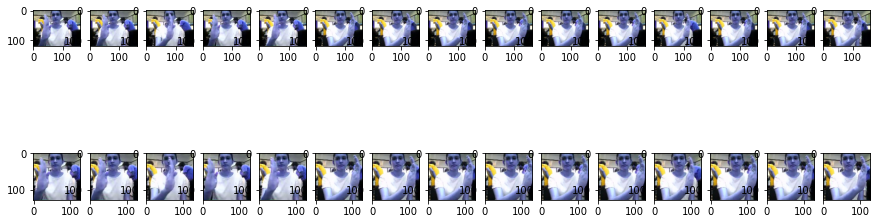

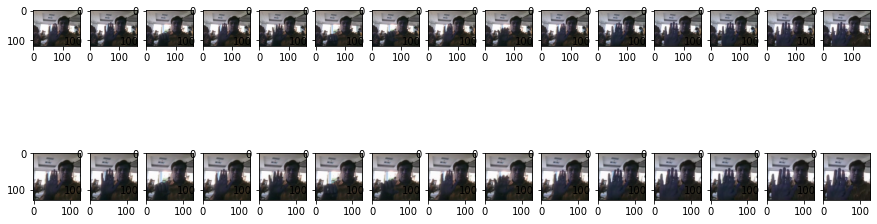

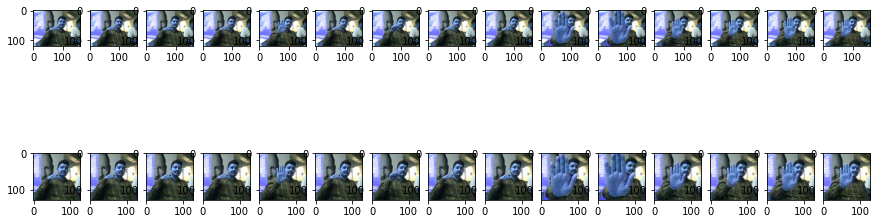

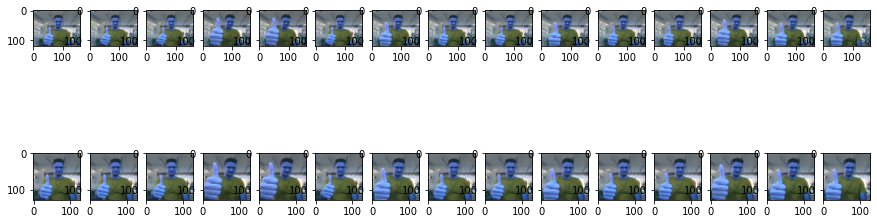

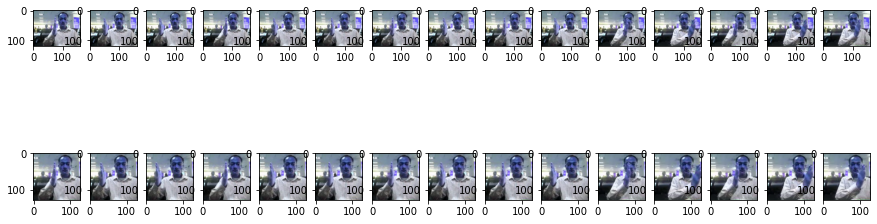

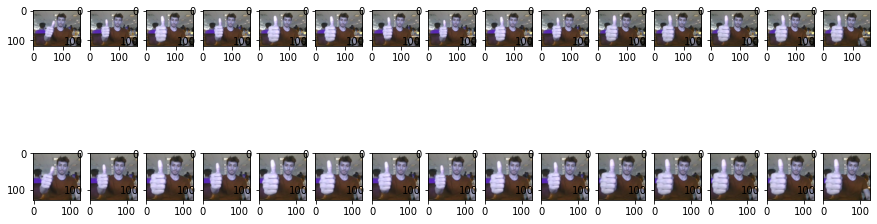

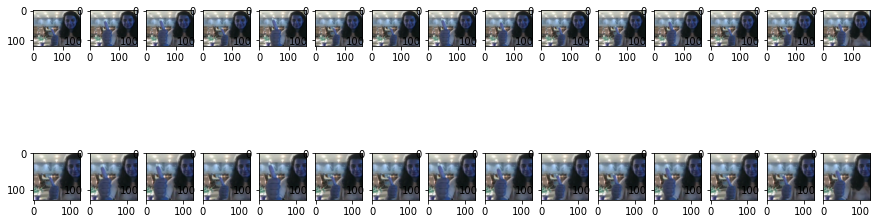

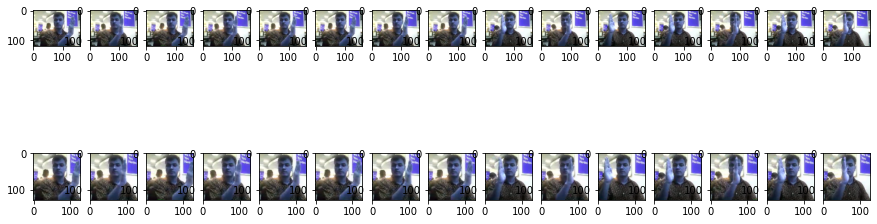

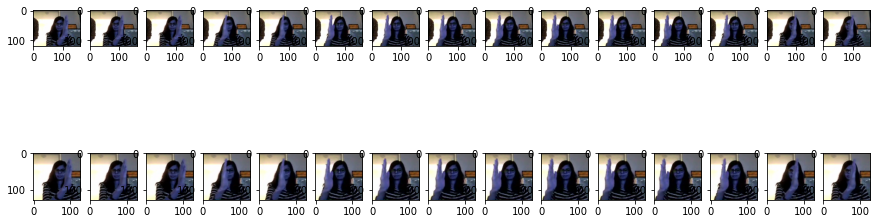

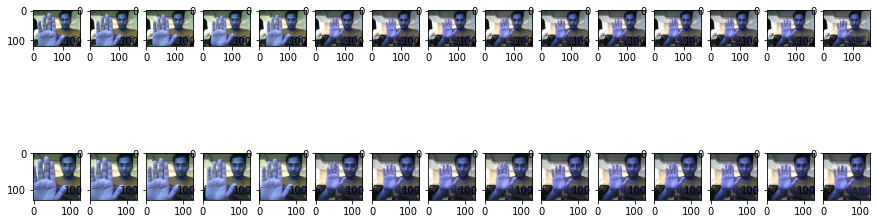

In [21]:
next(data)

Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [22]:
#### Conv3D

In [23]:
### generator(source_path, folder_list, batch_size,no_of_frames=15,dim_y=128,dim_z=128,verify=False):
no_of_frames=15
batch_size=10
dim_y=64
dim_z=64
train_generator = generator(train_path, train_doc,no_of_frames=no_of_frames,batch_size=batch_size,dim_y=dim_y,dim_z=dim_z)
val_generator = generator(train_path, train_doc,no_of_frames=no_of_frames,batch_size=batch_size,dim_y=dim_y,dim_z=dim_z)

In [24]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation,Dropout
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.optimizers import Adam
#write your model here

input_shape = (no_of_frames,dim_y,dim_z,3)
no_classes = 5 

model = Sequential()

model.add(Conv3D(8, kernel_size=(3,3,3), input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(16, kernel_size=(3,3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(32, kernel_size=(1,3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(64, kernel_size=(1,3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling3D(pool_size=(1,2,2)))

#Flatten Layers
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

#softmax layer
model.add(Dense(no_classes, activation='softmax'))


Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [25]:
optimiser = Adam()
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 15, 64, 64, 8)     656       
                                                                 
 batch_normalization (BatchN  (None, 15, 64, 64, 8)    32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 15, 64, 64, 8)     0         
                                                                 
 dropout (Dropout)           (None, 15, 64, 64, 8)     0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 7, 32, 32, 8)     0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 7, 32, 32, 16)     3

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [26]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [27]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
#filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_accuracy:.5f}.h5'
#filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_categorical_accuracy:.5f}.h5'
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{loss:.5f}.h5'
####  val_categorical_accuracy to be replaced by val_accuracy from started guide  ####

print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, cooldown=4, verbose=1,mode='auto',min_delta=0.0001)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]
##earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0,patience=10,verbose=1,mode="auto",baseline=None,restore_best_weights=True,start_from_epoch=0,)
## callbacks_list = [checkpoint, LR, earlystopping]
callbacks_list = [checkpoint, LR]

model_init_2023-05-1216_44_55.658377/model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{loss:.5f}.h5


Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [28]:
num_epochs = 30
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /Users/monu/Masters/Gesture_Recognition/Project_Data/train ; batch size = 10


/var/folders/nx/fgfzxpbx7mnbdd9mgv9jsd9w0000gn/T/ipykernel_40967/2415828183.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/30

Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/model-00001-1.96488-0.30000-1.96488.h5
 1/67 [..............................] - ETA: 4:42 - loss: 1.9649 - categorical_accuracy: 0.3000
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/model-00001-2.93499-0.20000-2.93499.h5
 2/67 [..............................] - ETA: 1:02 - loss: 2.9350 - categorical_accuracy: 0.2000
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/model-00001-3.23727-0.16667-3.23727.h5
 3/67 [>.............................] - ETA: 57s - loss: 3.2373 - categorical_accuracy: 0.1667 
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/model-00001-3.59897-0.15000-3.59897.h5
 4/67 [>.............................] - ETA: 1:19 - loss: 3.5990 - categorical_accuracy: 0.1500
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/model-00001-3.46598-0.14000-3.46598.h5
 5/67 [=>............................] - ETA: 1:32 - loss: 3.4660 - categorical_accuracy: 0.140

42/67 [=================>............] - ETA: 29s - loss: 2.1167 - categorical_accuracy: 0.2167
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/model-00001-2.10785-0.21395-2.10785.h5
43/67 [==================>...........] - ETA: 28s - loss: 2.1079 - categorical_accuracy: 0.2140
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/model-00001-2.09411-0.21591-2.09411.h5
44/67 [==================>...........] - ETA: 27s - loss: 2.0941 - categorical_accuracy: 0.2159
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/model-00001-2.08031-0.21778-2.08031.h5
45/67 [===================>..........] - ETA: 26s - loss: 2.0803 - categorical_accuracy: 0.2178
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/model-00001-2.07100-0.21739-2.07100.h5
46/67 [===================>..........] - ETA: 24s - loss: 2.0710 - categorical_accuracy: 0.2174
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/model-00001-2.06232-0.21702-2.06232.h5
47/67 [========

15/67 [=====>........................] - ETA: 51s - loss: 1.5051 - categorical_accuracy: 0.3267
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/model-00002-1.50235-0.33125-1.50235.h5
16/67 [======>.......................] - ETA: 52s - loss: 1.5023 - categorical_accuracy: 0.3313
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/model-00002-1.49832-0.34118-1.49832.h5
17/67 [======>.......................] - ETA: 51s - loss: 1.4983 - categorical_accuracy: 0.3412
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/model-00002-1.49616-0.34444-1.49616.h5
18/67 [=======>......................] - ETA: 51s - loss: 1.4962 - categorical_accuracy: 0.3444
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/model-00002-1.47582-0.36316-1.47582.h5
19/67 [=======>......................] - ETA: 49s - loss: 1.4758 - categorical_accuracy: 0.3632
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/model-00002-1.47621-0.36500-1.47621.h5
20/67 [=======>

57/67 [========================>.....] - ETA: 10s - loss: 1.4635 - categorical_accuracy: 0.3491
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/model-00002-1.45829-0.35172-1.45829.h5
58/67 [========================>.....] - ETA: 9s - loss: 1.4583 - categorical_accuracy: 0.3517 
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/model-00002-1.45586-0.34915-1.45586.h5
59/67 [=========================>....] - ETA: 8s - loss: 1.4559 - categorical_accuracy: 0.3492
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/model-00002-1.45173-0.34833-1.45173.h5
60/67 [=========================>....] - ETA: 7s - loss: 1.4517 - categorical_accuracy: 0.3483
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/model-00002-1.44846-0.35082-1.44846.h5
61/67 [==========================>...] - ETA: 6s - loss: 1.4485 - categorical_accuracy: 0.3508
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/model-00002-1.44769-0.35000-1.44769.h5
62/67 [===========

31/67 [============>.................] - ETA: 37s - loss: 1.3237 - categorical_accuracy: 0.4129
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/model-00003-1.32293-0.41250-1.32293.h5
32/67 [=============>................] - ETA: 36s - loss: 1.3229 - categorical_accuracy: 0.4125
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/model-00003-1.31729-0.41515-1.31729.h5
33/67 [=============>................] - ETA: 34s - loss: 1.3173 - categorical_accuracy: 0.4152
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/model-00003-1.32268-0.41471-1.32268.h5
34/67 [==============>...............] - ETA: 33s - loss: 1.3227 - categorical_accuracy: 0.4147
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/model-00003-1.31374-0.42000-1.31374.h5
35/67 [==============>...............] - ETA: 32s - loss: 1.3137 - categorical_accuracy: 0.4200
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/model-00003-1.31073-0.41667-1.31073.h5
36/67 [========

 5/67 [=>............................] - ETA: 1:07 - loss: 1.4747 - categorical_accuracy: 0.2400
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/model-00004-1.43654-0.28333-1.43654.h5
 6/67 [=>............................] - ETA: 1:04 - loss: 1.4365 - categorical_accuracy: 0.2833
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/model-00004-1.47993-0.27143-1.47993.h5
 7/67 [==>...........................] - ETA: 1:05 - loss: 1.4799 - categorical_accuracy: 0.2714
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/model-00004-1.47603-0.25000-1.47603.h5
 8/67 [==>...........................] - ETA: 1:06 - loss: 1.4760 - categorical_accuracy: 0.2500
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/model-00004-1.44665-0.26667-1.44665.h5
 9/67 [===>..........................] - ETA: 1:06 - loss: 1.4466 - categorical_accuracy: 0.2667
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/model-00004-1.45624-0.27000-1.45624.h5
10/67 [===

47/67 [====================>.........] - ETA: 21s - loss: 1.3577 - categorical_accuracy: 0.3702
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/model-00004-1.35358-0.36875-1.35358.h5
48/67 [====================>.........] - ETA: 20s - loss: 1.3536 - categorical_accuracy: 0.3688
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/model-00004-1.35542-0.36939-1.35542.h5
49/67 [====================>.........] - ETA: 19s - loss: 1.3554 - categorical_accuracy: 0.3694
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/model-00004-1.35589-0.36600-1.35589.h5
50/67 [=====================>........] - ETA: 18s - loss: 1.3559 - categorical_accuracy: 0.3660
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/model-00004-1.35171-0.36667-1.35171.h5
51/67 [=====================>........] - ETA: 17s - loss: 1.3517 - categorical_accuracy: 0.3667
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/model-00004-1.35995-0.36154-1.35995.h5
52/67 [========

21/67 [========>.....................] - ETA: 41s - loss: 1.2757 - categorical_accuracy: 0.4762
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/model-00005-1.25787-0.48182-1.25787.h5
22/67 [========>.....................] - ETA: 40s - loss: 1.2579 - categorical_accuracy: 0.4818
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/model-00005-1.26512-0.46957-1.26512.h5
23/67 [=========>....................] - ETA: 40s - loss: 1.2651 - categorical_accuracy: 0.4696
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/model-00005-1.26753-0.47083-1.26753.h5
24/67 [=========>....................] - ETA: 39s - loss: 1.2675 - categorical_accuracy: 0.4708
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/model-00005-1.27075-0.45600-1.27075.h5
25/67 [==========>...................] - ETA: 38s - loss: 1.2708 - categorical_accuracy: 0.4560
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/model-00005-1.25807-0.46923-1.25807.h5
26/67 [========

63/67 [===========================>..] - ETA: 3s - loss: 1.2552 - categorical_accuracy: 0.4587
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/model-00005-1.24979-0.46094-1.24979.h5
64/67 [===========================>..] - ETA: 2s - loss: 1.2498 - categorical_accuracy: 0.4609
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/model-00005-1.24946-0.46000-1.24946.h5
65/67 [============================>.] - ETA: 1s - loss: 1.2495 - categorical_accuracy: 0.4600
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/model-00005-1.25197-0.45606-1.25197.h5
66/67 [============================>.] - ETA: 0s - loss: 1.2520 - categorical_accuracy: 0.4561
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/model-00005-1.24995-0.45701-1.24995.h5
67/67 [==============================] - 71s 1s/step - loss: 1.2499 - categorical_accuracy: 0.4570 - val_loss: 1.9055 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 6/30

Epoch 6: saving model to model_init_20

37/67 [===============>..............] - ETA: 25s - loss: 1.1905 - categorical_accuracy: 0.4892
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/model-00006-1.19122-0.48684-1.19122.h5
38/67 [================>.............] - ETA: 24s - loss: 1.1912 - categorical_accuracy: 0.4868
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/model-00006-1.19493-0.47949-1.19493.h5
39/67 [================>.............] - ETA: 23s - loss: 1.1949 - categorical_accuracy: 0.4795
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/model-00006-1.19282-0.48000-1.19282.h5
40/67 [================>.............] - ETA: 22s - loss: 1.1928 - categorical_accuracy: 0.4800
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/model-00006-1.18822-0.48049-1.18822.h5
41/67 [=================>............] - ETA: 21s - loss: 1.1882 - categorical_accuracy: 0.4805
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/model-00006-1.18270-0.48333-1.18270.h5
42/67 [========

11/67 [===>..........................] - ETA: 46s - loss: 1.1841 - categorical_accuracy: 0.4909
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/model-00007-1.22949-0.48333-1.22949.h5
12/67 [====>.........................] - ETA: 45s - loss: 1.2295 - categorical_accuracy: 0.4833
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/model-00007-1.21701-0.48462-1.21701.h5
13/67 [====>.........................] - ETA: 44s - loss: 1.2170 - categorical_accuracy: 0.4846
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/model-00007-1.20769-0.48571-1.20769.h5
14/67 [=====>........................] - ETA: 43s - loss: 1.2077 - categorical_accuracy: 0.4857
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/model-00007-1.22876-0.47333-1.22876.h5
15/67 [=====>........................] - ETA: 43s - loss: 1.2288 - categorical_accuracy: 0.4733
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/model-00007-1.23906-0.46875-1.23906.h5
16/67 [======>.

53/67 [======================>.......] - ETA: 12s - loss: 1.2016 - categorical_accuracy: 0.4981
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/model-00007-1.20411-0.49259-1.20411.h5
54/67 [=======================>......] - ETA: 11s - loss: 1.2041 - categorical_accuracy: 0.4926
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/model-00007-1.19975-0.49636-1.19975.h5
55/67 [=======================>......] - ETA: 10s - loss: 1.1998 - categorical_accuracy: 0.4964
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/model-00007-1.20151-0.49821-1.20151.h5
56/67 [========================>.....] - ETA: 9s - loss: 1.2015 - categorical_accuracy: 0.4982 
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/model-00007-1.19929-0.50000-1.19929.h5
57/67 [========================>.....] - ETA: 8s - loss: 1.1993 - categorical_accuracy: 0.5000
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/model-00007-1.20364-0.49828-1.20364.h5
58/67 [=========

27/67 [===========>..................] - ETA: 36s - loss: 1.0911 - categorical_accuracy: 0.5593
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/model-00008-1.08699-0.56786-1.08699.h5
28/67 [===========>..................] - ETA: 35s - loss: 1.0870 - categorical_accuracy: 0.5679
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/model-00008-1.08750-0.56897-1.08750.h5
29/67 [===========>..................] - ETA: 34s - loss: 1.0875 - categorical_accuracy: 0.5690
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/model-00008-1.08921-0.56667-1.08921.h5
30/67 [============>.................] - ETA: 33s - loss: 1.0892 - categorical_accuracy: 0.5667
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/model-00008-1.08150-0.57097-1.08150.h5
31/67 [============>.................] - ETA: 32s - loss: 1.0815 - categorical_accuracy: 0.5710
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/model-00008-1.08630-0.57187-1.08630.h5
32/67 [========

 1/67 [..............................] - ETA: 1:04 - loss: 1.0425 - categorical_accuracy: 0.6000
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/model-00009-1.11233-0.60000-1.11233.h5
 2/67 [..............................] - ETA: 58s - loss: 1.1123 - categorical_accuracy: 0.6000 
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/model-00009-1.12202-0.56667-1.12202.h5
 3/67 [>.............................] - ETA: 1:00 - loss: 1.1220 - categorical_accuracy: 0.5667
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/model-00009-1.10386-0.57500-1.10386.h5
 4/67 [>.............................] - ETA: 59s - loss: 1.1039 - categorical_accuracy: 0.5750 
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/model-00009-1.09748-0.56000-1.09748.h5
 5/67 [=>............................] - ETA: 59s - loss: 1.0975 - categorical_accuracy: 0.5600
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/model-00009-1.11338-0.55000-1.11338.h5
 6/67 [=>..

43/67 [==================>...........] - ETA: 25s - loss: 1.0477 - categorical_accuracy: 0.5698
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/model-00009-1.04602-0.56818-1.04602.h5
44/67 [==================>...........] - ETA: 23s - loss: 1.0460 - categorical_accuracy: 0.5682
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/model-00009-1.04886-0.56444-1.04886.h5
45/67 [===================>..........] - ETA: 23s - loss: 1.0489 - categorical_accuracy: 0.5644
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/model-00009-1.04556-0.56739-1.04556.h5
46/67 [===================>..........] - ETA: 21s - loss: 1.0456 - categorical_accuracy: 0.5674
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/model-00009-1.03962-0.57021-1.03962.h5
47/67 [====================>.........] - ETA: 20s - loss: 1.0396 - categorical_accuracy: 0.5702
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/model-00009-1.04528-0.56458-1.04528.h5
48/67 [========

16/67 [======>.......................] - ETA: 58s - loss: 1.0052 - categorical_accuracy: 0.6438
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/model-00010-1.00628-0.63529-1.00628.h5
17/67 [======>.......................] - ETA: 56s - loss: 1.0063 - categorical_accuracy: 0.6353
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/model-00010-0.99457-0.63889-0.99457.h5
18/67 [=======>......................] - ETA: 54s - loss: 0.9946 - categorical_accuracy: 0.6389
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/model-00010-0.98266-0.64737-0.98266.h5
19/67 [=======>......................] - ETA: 53s - loss: 0.9827 - categorical_accuracy: 0.6474
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/model-00010-0.96900-0.65500-0.96900.h5
20/67 [=======>......................] - ETA: 52s - loss: 0.9690 - categorical_accuracy: 0.6550
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/model-00010-0.96394-0.64762-0.96394.h5
21/67 [===

57/67 [========================>.....] - ETA: 10s - loss: 0.9348 - categorical_accuracy: 0.6509
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/model-00010-0.92578-0.65517-0.92578.h5
58/67 [========================>.....] - ETA: 9s - loss: 0.9258 - categorical_accuracy: 0.6552 
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/model-00010-0.92215-0.65763-0.92215.h5
59/67 [=========================>....] - ETA: 8s - loss: 0.9222 - categorical_accuracy: 0.6576
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/model-00010-0.92182-0.65833-0.92182.h5
60/67 [=========================>....] - ETA: 7s - loss: 0.9218 - categorical_accuracy: 0.6583
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/model-00010-0.92341-0.65574-0.92341.h5
61/67 [==========================>...] - ETA: 6s - loss: 0.9234 - categorical_accuracy: 0.6557
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/model-00010-0.91742-0.65645-0.91742.h5
62/67 [======

31/67 [============>.................] - ETA: 38s - loss: 0.9217 - categorical_accuracy: 0.6290
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/model-00011-0.92555-0.63125-0.92555.h5
32/67 [=============>................] - ETA: 37s - loss: 0.9256 - categorical_accuracy: 0.6313
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/model-00011-0.91623-0.63636-0.91623.h5
33/67 [=============>................] - ETA: 36s - loss: 0.9162 - categorical_accuracy: 0.6364
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/model-00011-0.91819-0.63529-0.91819.h5
34/67 [==============>...............] - ETA: 35s - loss: 0.9182 - categorical_accuracy: 0.6353
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/model-00011-0.93427-0.62571-0.93427.h5
35/67 [==============>...............] - ETA: 34s - loss: 0.9343 - categorical_accuracy: 0.6257
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/model-00011-0.93003-0.62778-0.93003.h5
36/67 [===

 5/67 [=>............................] - ETA: 50s - loss: 0.8267 - categorical_accuracy: 0.6800
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/model-00012-0.82042-0.66667-0.82042.h5
 6/67 [=>............................] - ETA: 50s - loss: 0.8204 - categorical_accuracy: 0.6667
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/model-00012-0.87370-0.64286-0.87370.h5
 7/67 [==>...........................] - ETA: 50s - loss: 0.8737 - categorical_accuracy: 0.6429
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/model-00012-0.87743-0.67500-0.87743.h5
 8/67 [==>...........................] - ETA: 51s - loss: 0.8774 - categorical_accuracy: 0.6750
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/model-00012-0.86382-0.68889-0.86382.h5
 9/67 [===>..........................] - ETA: 50s - loss: 0.8638 - categorical_accuracy: 0.6889
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/model-00012-0.91498-0.66000-0.91498.h5
10/67 [===

46/67 [===================>..........] - ETA: 20s - loss: 0.9294 - categorical_accuracy: 0.6261
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/model-00012-0.92885-0.62766-0.92885.h5
47/67 [====================>.........] - ETA: 19s - loss: 0.9288 - categorical_accuracy: 0.6277
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/model-00012-0.92259-0.62708-0.92259.h5
48/67 [====================>.........] - ETA: 18s - loss: 0.9226 - categorical_accuracy: 0.6271
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/model-00012-0.91501-0.63061-0.91501.h5
49/67 [====================>.........] - ETA: 17s - loss: 0.9150 - categorical_accuracy: 0.6306
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/model-00012-0.91806-0.63200-0.91806.h5
50/67 [=====================>........] - ETA: 16s - loss: 0.9181 - categorical_accuracy: 0.6320
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/model-00012-0.91720-0.62941-0.91720.h5
51/67 [===

20/67 [=======>......................] - ETA: 41s - loss: 0.9583 - categorical_accuracy: 0.5750
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/model-00013-0.95171-0.57143-0.95171.h5
21/67 [========>.....................] - ETA: 40s - loss: 0.9517 - categorical_accuracy: 0.5714
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/model-00013-0.94649-0.57273-0.94649.h5
22/67 [========>.....................] - ETA: 39s - loss: 0.9465 - categorical_accuracy: 0.5727
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/model-00013-0.94601-0.57391-0.94601.h5
23/67 [=========>....................] - ETA: 39s - loss: 0.9460 - categorical_accuracy: 0.5739
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/model-00013-0.95850-0.57917-0.95850.h5
24/67 [=========>....................] - ETA: 38s - loss: 0.9585 - categorical_accuracy: 0.5792
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/model-00013-0.95257-0.58000-0.95257.h5
25/67 [===

61/67 [==========================>...] - ETA: 5s - loss: 0.9070 - categorical_accuracy: 0.6164
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/model-00013-0.90842-0.61613-0.90842.h5
62/67 [==========================>...] - ETA: 4s - loss: 0.9084 - categorical_accuracy: 0.6161
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/model-00013-0.90588-0.61746-0.90588.h5
63/67 [===========================>..] - ETA: 3s - loss: 0.9059 - categorical_accuracy: 0.6175
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/model-00013-0.90503-0.62031-0.90503.h5
64/67 [===========================>..] - ETA: 2s - loss: 0.9050 - categorical_accuracy: 0.6203
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/model-00013-0.90828-0.61846-0.90828.h5
65/67 [============================>.] - ETA: 1s - loss: 0.9083 - categorical_accuracy: 0.6185
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/model-00013-0.91068-0.61515-0.91068.h5
66/67 [========

35/67 [==============>...............] - ETA: 27s - loss: 0.9344 - categorical_accuracy: 0.6229
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/model-00014-0.93483-0.61944-0.93483.h5
36/67 [===============>..............] - ETA: 26s - loss: 0.9348 - categorical_accuracy: 0.6194
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/model-00014-0.93072-0.62162-0.93072.h5
37/67 [===============>..............] - ETA: 25s - loss: 0.9307 - categorical_accuracy: 0.6216
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/model-00014-0.93198-0.62368-0.93198.h5
38/67 [================>.............] - ETA: 25s - loss: 0.9320 - categorical_accuracy: 0.6237
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/model-00014-0.93299-0.62564-0.93299.h5
39/67 [================>.............] - ETA: 24s - loss: 0.9330 - categorical_accuracy: 0.6256
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/model-00014-0.92851-0.62500-0.92851.h5
40/67 [===

 9/67 [===>..........................] - ETA: 50s - loss: 0.8969 - categorical_accuracy: 0.6889
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/model-00015-0.87055-0.70000-0.87055.h5
10/67 [===>..........................] - ETA: 50s - loss: 0.8705 - categorical_accuracy: 0.7000
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/model-00015-0.90543-0.68182-0.90543.h5
11/67 [===>..........................] - ETA: 52s - loss: 0.9054 - categorical_accuracy: 0.6818
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/model-00015-0.88907-0.67500-0.88907.h5
12/67 [====>.........................] - ETA: 52s - loss: 0.8891 - categorical_accuracy: 0.6750
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/model-00015-0.89982-0.66154-0.89982.h5
13/67 [====>.........................] - ETA: 52s - loss: 0.8998 - categorical_accuracy: 0.6615
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/model-00015-0.88441-0.67143-0.88441.h5
14/67 [===

50/67 [=====================>........] - ETA: 16s - loss: 0.8788 - categorical_accuracy: 0.6620
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/model-00015-0.89211-0.65098-0.89211.h5
51/67 [=====================>........] - ETA: 15s - loss: 0.8921 - categorical_accuracy: 0.6510
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/model-00015-0.88696-0.65385-0.88696.h5
52/67 [======================>.......] - ETA: 14s - loss: 0.8870 - categorical_accuracy: 0.6538
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/model-00015-0.88247-0.65660-0.88247.h5
53/67 [======================>.......] - ETA: 13s - loss: 0.8825 - categorical_accuracy: 0.6566
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/model-00015-0.87803-0.65741-0.87803.h5
54/67 [=======================>......] - ETA: 12s - loss: 0.8780 - categorical_accuracy: 0.6574
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/model-00015-0.87770-0.65818-0.87770.h5
55/67 [===

24/67 [=========>....................] - ETA: 40s - loss: 0.8620 - categorical_accuracy: 0.6292
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/model-00016-0.85292-0.64000-0.85292.h5
25/67 [==========>...................] - ETA: 40s - loss: 0.8529 - categorical_accuracy: 0.6400
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/model-00016-0.84497-0.63846-0.84497.h5
26/67 [==========>...................] - ETA: 40s - loss: 0.8450 - categorical_accuracy: 0.6385
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/model-00016-0.83803-0.64074-0.83803.h5
27/67 [===========>..................] - ETA: 39s - loss: 0.8380 - categorical_accuracy: 0.6407
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/model-00016-0.82928-0.65000-0.82928.h5
28/67 [===========>..................] - ETA: 38s - loss: 0.8293 - categorical_accuracy: 0.6500
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/model-00016-0.83294-0.64138-0.83294.h5
29/67 [===

65/67 [============================>.] - ETA: 1s - loss: 0.8610 - categorical_accuracy: 0.6415
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/model-00016-0.86736-0.63939-0.86736.h5
66/67 [============================>.] - ETA: 0s - loss: 0.8674 - categorical_accuracy: 0.6394
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/model-00016-0.86678-0.63952-0.86678.h5
67/67 [==============================] - 76s 1s/step - loss: 0.8668 - categorical_accuracy: 0.6395 - val_loss: 2.1558 - val_categorical_accuracy: 0.1700 - lr: 1.0000e-05
Epoch 17/30

Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/model-00017-0.87041-0.70000-0.87041.h5
 1/67 [..............................] - ETA: 1:01 - loss: 0.8704 - categorical_accuracy: 0.7000
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/model-00017-0.88589-0.65000-0.88589.h5
 2/67 [..............................] - ETA: 1:07 - loss: 0.8859 - categorical_accuracy: 0.6500
Epoch 17: saving model to

39/67 [================>.............] - ETA: 29s - loss: 0.8617 - categorical_accuracy: 0.6744
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/model-00017-0.87157-0.67250-0.87157.h5
40/67 [================>.............] - ETA: 28s - loss: 0.8716 - categorical_accuracy: 0.6725
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/model-00017-0.86743-0.67317-0.86743.h5
41/67 [=================>............] - ETA: 27s - loss: 0.8674 - categorical_accuracy: 0.6732
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/model-00017-0.87402-0.66667-0.87402.h5
42/67 [=================>............] - ETA: 26s - loss: 0.8740 - categorical_accuracy: 0.6667
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/model-00017-0.85956-0.67442-0.85956.h5
43/67 [==================>...........] - ETA: 24s - loss: 0.8596 - categorical_accuracy: 0.6744
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/model-00017-0.85958-0.67500-0.85958.h5
44/67 [===

12/67 [====>.........................] - ETA: 54s - loss: 0.8134 - categorical_accuracy: 0.7167
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/model-00018-0.83077-0.70769-0.83077.h5
13/67 [====>.........................] - ETA: 53s - loss: 0.8308 - categorical_accuracy: 0.7077
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/model-00018-0.83937-0.70000-0.83937.h5
14/67 [=====>........................] - ETA: 53s - loss: 0.8394 - categorical_accuracy: 0.7000
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/model-00018-0.84479-0.70000-0.84479.h5
15/67 [=====>........................] - ETA: 51s - loss: 0.8448 - categorical_accuracy: 0.7000
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/model-00018-0.84276-0.70000-0.84276.h5
16/67 [======>.......................] - ETA: 49s - loss: 0.8428 - categorical_accuracy: 0.7000
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/model-00018-0.86901-0.69412-0.86901.h5
17/67 [===

53/67 [======================>.......] - ETA: 13s - loss: 0.8529 - categorical_accuracy: 0.6792
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/model-00018-0.85376-0.67778-0.85376.h5
54/67 [=======================>......] - ETA: 12s - loss: 0.8538 - categorical_accuracy: 0.6778
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/model-00018-0.85000-0.67818-0.85000.h5
55/67 [=======================>......] - ETA: 11s - loss: 0.8500 - categorical_accuracy: 0.6782
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/model-00018-0.84904-0.67679-0.84904.h5
56/67 [========================>.....] - ETA: 10s - loss: 0.8490 - categorical_accuracy: 0.6768
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/model-00018-0.84206-0.67895-0.84206.h5
57/67 [========================>.....] - ETA: 9s - loss: 0.8421 - categorical_accuracy: 0.6789 
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/model-00018-0.84298-0.68103-0.84298.h5
58/67 [===

27/67 [===========>..................] - ETA: 36s - loss: 0.9107 - categorical_accuracy: 0.6074
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/model-00019-0.89915-0.62143-0.89915.h5
28/67 [===========>..................] - ETA: 35s - loss: 0.8991 - categorical_accuracy: 0.6214
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/model-00019-0.89514-0.62759-0.89514.h5
29/67 [===========>..................] - ETA: 34s - loss: 0.8951 - categorical_accuracy: 0.6276
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/model-00019-0.89026-0.63333-0.89026.h5
30/67 [============>.................] - ETA: 33s - loss: 0.8903 - categorical_accuracy: 0.6333
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/model-00019-0.89224-0.63548-0.89224.h5
31/67 [============>.................] - ETA: 32s - loss: 0.8922 - categorical_accuracy: 0.6355
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/model-00019-0.88874-0.64375-0.88874.h5
32/67 [===

 1/67 [..............................] - ETA: 50s - loss: 0.9306 - categorical_accuracy: 0.6000
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/model-00020-0.85658-0.65000-0.85658.h5
 2/67 [..............................] - ETA: 50s - loss: 0.8566 - categorical_accuracy: 0.6500
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/model-00020-0.82908-0.63333-0.82908.h5
 3/67 [>.............................] - ETA: 52s - loss: 0.8291 - categorical_accuracy: 0.6333
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/model-00020-0.86954-0.62500-0.86954.h5
 4/67 [>.............................] - ETA: 54s - loss: 0.8695 - categorical_accuracy: 0.6250
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/model-00020-0.86922-0.66000-0.86922.h5
 5/67 [=>............................] - ETA: 54s - loss: 0.8692 - categorical_accuracy: 0.6600
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/model-00020-0.83661-0.68333-0.83661.h5
 6/67 [=>.

42/67 [=================>............] - ETA: 23s - loss: 0.8679 - categorical_accuracy: 0.6381
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/model-00020-0.86954-0.63721-0.86954.h5
43/67 [==================>...........] - ETA: 22s - loss: 0.8695 - categorical_accuracy: 0.6372
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/model-00020-0.86778-0.64091-0.86778.h5
44/67 [==================>...........] - ETA: 21s - loss: 0.8678 - categorical_accuracy: 0.6409
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/model-00020-0.87378-0.63111-0.87378.h5
45/67 [===================>..........] - ETA: 20s - loss: 0.8738 - categorical_accuracy: 0.6311
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/model-00020-0.87699-0.63043-0.87699.h5
46/67 [===================>..........] - ETA: 20s - loss: 0.8770 - categorical_accuracy: 0.6304
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/model-00020-0.87263-0.63191-0.87263.h5
47/67 [===

16/67 [======>.......................] - ETA: 53s - loss: 0.8647 - categorical_accuracy: 0.6750
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/model-00021-0.86244-0.67059-0.86244.h5
17/67 [======>.......................] - ETA: 51s - loss: 0.8624 - categorical_accuracy: 0.6706
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/model-00021-0.88427-0.65000-0.88427.h5
18/67 [=======>......................] - ETA: 50s - loss: 0.8843 - categorical_accuracy: 0.6500
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/model-00021-0.89679-0.63684-0.89679.h5
19/67 [=======>......................] - ETA: 48s - loss: 0.8968 - categorical_accuracy: 0.6368
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/model-00021-0.89202-0.63500-0.89202.h5
20/67 [=======>......................] - ETA: 48s - loss: 0.8920 - categorical_accuracy: 0.6350
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/model-00021-0.90331-0.63333-0.90331.h5
21/67 [===

57/67 [========================>.....] - ETA: 10s - loss: 0.8838 - categorical_accuracy: 0.6404
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/model-00021-0.88409-0.64138-0.88409.h5
58/67 [========================>.....] - ETA: 9s - loss: 0.8841 - categorical_accuracy: 0.6414 
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/model-00021-0.87469-0.64746-0.87469.h5
59/67 [=========================>....] - ETA: 8s - loss: 0.8747 - categorical_accuracy: 0.6475
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/model-00021-0.86995-0.64833-0.86995.h5
60/67 [=========================>....] - ETA: 7s - loss: 0.8700 - categorical_accuracy: 0.6483
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/model-00021-0.86774-0.65082-0.86774.h5
61/67 [==========================>...] - ETA: 6s - loss: 0.8677 - categorical_accuracy: 0.6508
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/model-00021-0.87027-0.64839-0.87027.h5
62/67 [======

31/67 [============>.................] - ETA: 39s - loss: 0.8376 - categorical_accuracy: 0.6581
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/model-00022-0.83508-0.65938-0.83508.h5
32/67 [=============>................] - ETA: 39s - loss: 0.8351 - categorical_accuracy: 0.6594
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/model-00022-0.82720-0.66667-0.82720.h5
33/67 [=============>................] - ETA: 37s - loss: 0.8272 - categorical_accuracy: 0.6667
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/model-00022-0.82122-0.67647-0.82122.h5
34/67 [==============>...............] - ETA: 36s - loss: 0.8212 - categorical_accuracy: 0.6765
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/model-00022-0.82581-0.67714-0.82581.h5
35/67 [==============>...............] - ETA: 35s - loss: 0.8258 - categorical_accuracy: 0.6771
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/model-00022-0.82570-0.67222-0.82570.h5
36/67 [===

 5/67 [=>............................] - ETA: 54s - loss: 0.8774 - categorical_accuracy: 0.6200
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/model-00023-0.90422-0.63333-0.90422.h5
 6/67 [=>............................] - ETA: 52s - loss: 0.9042 - categorical_accuracy: 0.6333
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/model-00023-0.87465-0.65714-0.87465.h5
 7/67 [==>...........................] - ETA: 50s - loss: 0.8746 - categorical_accuracy: 0.6571
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/model-00023-0.86548-0.67500-0.86548.h5
 8/67 [==>...........................] - ETA: 50s - loss: 0.8655 - categorical_accuracy: 0.6750
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/model-00023-0.84771-0.67778-0.84771.h5
 9/67 [===>..........................] - ETA: 50s - loss: 0.8477 - categorical_accuracy: 0.6778
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/model-00023-0.81186-0.69000-0.81186.h5
10/67 [===

46/67 [===================>..........] - ETA: 20s - loss: 0.8904 - categorical_accuracy: 0.6457
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/model-00023-0.89218-0.64255-0.89218.h5
47/67 [====================>.........] - ETA: 19s - loss: 0.8922 - categorical_accuracy: 0.6426
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/model-00023-0.89482-0.64375-0.89482.h5
48/67 [====================>.........] - ETA: 18s - loss: 0.8948 - categorical_accuracy: 0.6438
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/model-00023-0.89670-0.64082-0.89670.h5
49/67 [====================>.........] - ETA: 17s - loss: 0.8967 - categorical_accuracy: 0.6408
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/model-00023-0.89812-0.64200-0.89812.h5
50/67 [=====================>........] - ETA: 16s - loss: 0.8981 - categorical_accuracy: 0.6420
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/model-00023-0.89526-0.64314-0.89526.h5
51/67 [===

20/67 [=======>......................] - ETA: 49s - loss: 0.8838 - categorical_accuracy: 0.6450
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/model-00024-0.88224-0.64286-0.88224.h5
21/67 [========>.....................] - ETA: 47s - loss: 0.8822 - categorical_accuracy: 0.6429
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/model-00024-0.87742-0.64091-0.87742.h5
22/67 [========>.....................] - ETA: 46s - loss: 0.8774 - categorical_accuracy: 0.6409
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/model-00024-0.87381-0.64348-0.87381.h5
23/67 [=========>....................] - ETA: 45s - loss: 0.8738 - categorical_accuracy: 0.6435
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/model-00024-0.88974-0.63333-0.88974.h5
24/67 [=========>....................] - ETA: 44s - loss: 0.8897 - categorical_accuracy: 0.6333
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/model-00024-0.88606-0.63600-0.88606.h5
25/67 [===

61/67 [==========================>...] - ETA: 6s - loss: 0.8917 - categorical_accuracy: 0.6377
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/model-00024-0.88425-0.64355-0.88425.h5
62/67 [==========================>...] - ETA: 5s - loss: 0.8843 - categorical_accuracy: 0.6435
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/model-00024-0.88399-0.64444-0.88399.h5
63/67 [===========================>..] - ETA: 4s - loss: 0.8840 - categorical_accuracy: 0.6444
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/model-00024-0.88120-0.64531-0.88120.h5
64/67 [===========================>..] - ETA: 3s - loss: 0.8812 - categorical_accuracy: 0.6453
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/model-00024-0.88280-0.64308-0.88280.h5
65/67 [============================>.] - ETA: 2s - loss: 0.8828 - categorical_accuracy: 0.6431
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/model-00024-0.88069-0.64394-0.88069.h5
66/67 [========

35/67 [==============>...............] - ETA: 30s - loss: 0.8462 - categorical_accuracy: 0.6714
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/model-00025-0.84211-0.67222-0.84211.h5
36/67 [===============>..............] - ETA: 29s - loss: 0.8421 - categorical_accuracy: 0.6722
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/model-00025-0.83106-0.68108-0.83106.h5
37/67 [===============>..............] - ETA: 28s - loss: 0.8311 - categorical_accuracy: 0.6811
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/model-00025-0.83375-0.67632-0.83375.h5
38/67 [================>.............] - ETA: 27s - loss: 0.8338 - categorical_accuracy: 0.6763
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/model-00025-0.82780-0.67949-0.82780.h5
39/67 [================>.............] - ETA: 26s - loss: 0.8278 - categorical_accuracy: 0.6795
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/model-00025-0.83766-0.67500-0.83766.h5
40/67 [===

 8/67 [==>...........................] - ETA: 56s - loss: 0.8079 - categorical_accuracy: 0.6875
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/model-00026-0.84480-0.66667-0.84480.h5
 9/67 [===>..........................] - ETA: 56s - loss: 0.8448 - categorical_accuracy: 0.6667
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/model-00026-0.86024-0.64000-0.86024.h5
10/67 [===>..........................] - ETA: 55s - loss: 0.8602 - categorical_accuracy: 0.6400
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/model-00026-0.86067-0.62727-0.86067.h5
11/67 [===>..........................] - ETA: 55s - loss: 0.8607 - categorical_accuracy: 0.6273
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/model-00026-0.84903-0.64167-0.84903.h5
12/67 [====>.........................] - ETA: 54s - loss: 0.8490 - categorical_accuracy: 0.6417
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/model-00026-0.85445-0.64615-0.85445.h5
13/67 [===

49/67 [====================>.........] - ETA: 20s - loss: 0.8652 - categorical_accuracy: 0.6531
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/model-00026-0.86788-0.65200-0.86788.h5
50/67 [=====================>........] - ETA: 19s - loss: 0.8679 - categorical_accuracy: 0.6520
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/model-00026-0.87273-0.65098-0.87273.h5
51/67 [=====================>........] - ETA: 18s - loss: 0.8727 - categorical_accuracy: 0.6510
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/model-00026-0.86537-0.65577-0.86537.h5
52/67 [======================>.......] - ETA: 17s - loss: 0.8654 - categorical_accuracy: 0.6558
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/model-00026-0.86517-0.65472-0.86517.h5
53/67 [======================>.......] - ETA: 16s - loss: 0.8652 - categorical_accuracy: 0.6547
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/model-00026-0.86663-0.65556-0.86663.h5
54/67 [===

23/67 [=========>....................] - ETA: 44s - loss: 0.8962 - categorical_accuracy: 0.6609
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/model-00027-0.88637-0.66667-0.88637.h5
24/67 [=========>....................] - ETA: 43s - loss: 0.8864 - categorical_accuracy: 0.6667
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/model-00027-0.89101-0.66000-0.89101.h5
25/67 [==========>...................] - ETA: 41s - loss: 0.8910 - categorical_accuracy: 0.6600
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/model-00027-0.88994-0.65769-0.88994.h5
26/67 [==========>...................] - ETA: 40s - loss: 0.8899 - categorical_accuracy: 0.6577
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/model-00027-0.89069-0.65556-0.89069.h5
27/67 [===========>..................] - ETA: 39s - loss: 0.8907 - categorical_accuracy: 0.6556
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/model-00027-0.90982-0.64643-0.90982.h5
28/67 [===

64/67 [===========================>..] - ETA: 3s - loss: 0.8741 - categorical_accuracy: 0.6516
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/model-00027-0.86914-0.65538-0.86914.h5
65/67 [============================>.] - ETA: 2s - loss: 0.8691 - categorical_accuracy: 0.6554
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/model-00027-0.86945-0.65455-0.86945.h5
66/67 [============================>.] - ETA: 1s - loss: 0.8694 - categorical_accuracy: 0.6545
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/model-00027-0.86753-0.65611-0.86753.h5
67/67 [==============================] - 79s 1s/step - loss: 0.8675 - categorical_accuracy: 0.6561 - val_loss: 2.0940 - val_categorical_accuracy: 0.1900 - lr: 1.0000e-09
Epoch 28/30

Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/model-00028-1.10756-0.50000-1.10756.h5
 1/67 [..............................] - ETA: 1:01 - loss: 1.1076 - categorical_accuracy: 0.5000
Epoch 28: saving model to m

38/67 [================>.............] - ETA: 29s - loss: 0.9166 - categorical_accuracy: 0.6368
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/model-00028-0.91674-0.63077-0.91674.h5
39/67 [================>.............] - ETA: 28s - loss: 0.9167 - categorical_accuracy: 0.6308
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/model-00028-0.91221-0.63250-0.91221.h5
40/67 [================>.............] - ETA: 27s - loss: 0.9122 - categorical_accuracy: 0.6325
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/model-00028-0.90686-0.63659-0.90686.h5
41/67 [=================>............] - ETA: 26s - loss: 0.9069 - categorical_accuracy: 0.6366
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/model-00028-0.90572-0.63810-0.90572.h5
42/67 [=================>............] - ETA: 25s - loss: 0.9057 - categorical_accuracy: 0.6381
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/model-00028-0.89886-0.64419-0.89886.h5
43/67 [===

12/67 [====>.........................] - ETA: 53s - loss: 0.8490 - categorical_accuracy: 0.6667
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/model-00029-0.85545-0.65385-0.85545.h5
13/67 [====>.........................] - ETA: 53s - loss: 0.8554 - categorical_accuracy: 0.6538
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/model-00029-0.84140-0.65714-0.84140.h5
14/67 [=====>........................] - ETA: 52s - loss: 0.8414 - categorical_accuracy: 0.6571
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/model-00029-0.83494-0.66000-0.83494.h5
15/67 [=====>........................] - ETA: 51s - loss: 0.8349 - categorical_accuracy: 0.6600
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/model-00029-0.82640-0.66250-0.82640.h5
16/67 [======>.......................] - ETA: 50s - loss: 0.8264 - categorical_accuracy: 0.6625
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/model-00029-0.83738-0.65882-0.83738.h5
17/67 [===

53/67 [======================>.......] - ETA: 13s - loss: 0.8771 - categorical_accuracy: 0.6509
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/model-00029-0.88518-0.64630-0.88518.h5
54/67 [=======================>......] - ETA: 13s - loss: 0.8852 - categorical_accuracy: 0.6463
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/model-00029-0.87991-0.64909-0.87991.h5
55/67 [=======================>......] - ETA: 12s - loss: 0.8799 - categorical_accuracy: 0.6491
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/model-00029-0.88087-0.64821-0.88087.h5
56/67 [========================>.....] - ETA: 11s - loss: 0.8809 - categorical_accuracy: 0.6482
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/model-00029-0.88141-0.64737-0.88141.h5
57/67 [========================>.....] - ETA: 10s - loss: 0.8814 - categorical_accuracy: 0.6474
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/model-00029-0.88136-0.64828-0.88136.h5
58/67 [===

27/67 [===========>..................] - ETA: 38s - loss: 0.8580 - categorical_accuracy: 0.7000
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/model-00030-0.84910-0.70000-0.84910.h5
28/67 [===========>..................] - ETA: 37s - loss: 0.8491 - categorical_accuracy: 0.7000
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/model-00030-0.86554-0.68966-0.86554.h5
29/67 [===========>..................] - ETA: 36s - loss: 0.8655 - categorical_accuracy: 0.6897
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/model-00030-0.86928-0.68000-0.86928.h5
30/67 [============>.................] - ETA: 35s - loss: 0.8693 - categorical_accuracy: 0.6800
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/model-00030-0.86701-0.68065-0.86701.h5
31/67 [============>.................] - ETA: 34s - loss: 0.8670 - categorical_accuracy: 0.6806
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/model-00030-0.86850-0.67813-0.86850.h5
32/67 [===

In [29]:
def plot_accuracy(history):
    # summarize history for accuracy
    plt.plot(history.history['categorical_accuracy']) # Get 
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [30]:
def plot_loss(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

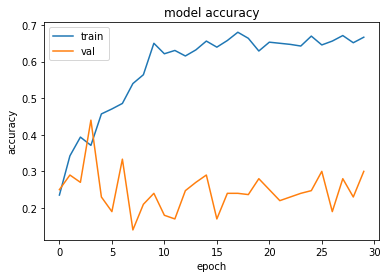

In [31]:
plot_accuracy(history)

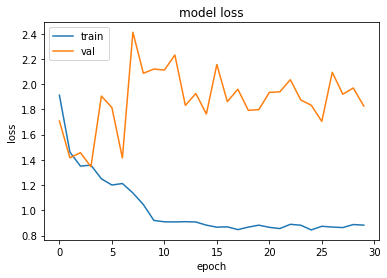

In [32]:
plot_loss(history)

#### CNN + RNN (LSTM )

In [33]:
from keras.layers.convolutional import  Conv2D,MaxPooling2D
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout,LSTM, Input, MaxPool3D,ZeroPadding3D

input_shape = (no_of_frames,dim_y,dim_z,3)
no_classes = 5 
model_lstm = Sequential()


model_lstm.add(TimeDistributed(Conv2D(8, (3,3),padding='same',  activation='relu'),input_shape = input_shape))


model_lstm.add(TimeDistributed(Conv2D(16, (3,3),padding='same',  activation='relu')))

model_lstm.add(TimeDistributed(MaxPooling2D((2,2), )))


model_lstm.add(TimeDistributed(Conv2D(32, (3,3),padding='same', activation='relu')))

model_lstm.add(TimeDistributed(MaxPooling2D((2,2), )))

model_lstm.add(TimeDistributed(Conv2D(64, (3,3),padding='same',  activation='relu')))

model_lstm.add(TimeDistributed(MaxPooling2D((2,2))))


model_lstm.add(TimeDistributed(BatchNormalization()))
model_lstm.add(Dropout(0.5))

model_lstm.add(TimeDistributed(Flatten()))

model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.5))


model_lstm.add(LSTM(128, return_sequences=False))
model_lstm.add(Dense(no_classes, activation='softmax')) # using Softmax as last layer


In [34]:
optimiser = Adam()
model_lstm.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_lstm.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 15, 64, 64, 8)    224       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 15, 64, 64, 16)   1168      
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 15, 32, 32, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 15, 32, 32, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 15, 16, 16, 32)  

In [35]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [36]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
#filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_accuracy:.5f}.h5'
#filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_categorical_accuracy:.5f}.h5'
filepath = model_name+ 'LSTM' + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{loss:.5f}.h5'
####  val_categorical_accuracy to be replaced by val_accuracy from started guide  ####

print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, cooldown=4, verbose=1,mode='auto',min_delta=0.0001)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]
##earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0,patience=10,verbose=1,mode="auto",baseline=None,restore_best_weights=True,start_from_epoch=0,)
## callbacks_list = [checkpoint, LR, earlystopping]
callbacks_list = [checkpoint, LR]

model_init_2023-05-1216_44_55.658377/LSTMmodel-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{loss:.5f}.h5


In [37]:
num_epochs = 30
history_lstm = model_lstm.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/var/folders/nx/fgfzxpbx7mnbdd9mgv9jsd9w0000gn/T/ipykernel_40967/2843559408.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_lstm = model_lstm.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/30

Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00001-1.65116-0.10000-1.65116.h5
 1/67 [..............................] - ETA: 4:00 - loss: 1.6512 - categorical_accuracy: 0.1000
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00001-1.69444-0.15000-1.69444.h5
 2/67 [..............................] - ETA: 44s - loss: 1.6944 - categorical_accuracy: 0.1500 
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00001-1.64315-0.20000-1.64315.h5
 3/67 [>.............................] - ETA: 52s - loss: 1.6432 - categorical_accuracy: 0.2000
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00001-1.64097-0.20000-1.64097.h5
 4/67 [>.............................] - ETA: 56s - loss: 1.6410 - categorical_accuracy: 0.2000
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00001-1.58540-0.26000-1.58540.h5
 5/67 [=>............................] - ETA: 54s - loss: 1.5854 - categorica

41/67 [=================>............] - ETA: 20s - loss: 1.5189 - categorical_accuracy: 0.3220
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00001-1.51690-0.32381-1.51690.h5
42/67 [=================>............] - ETA: 19s - loss: 1.5169 - categorical_accuracy: 0.3238
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00001-1.51195-0.32558-1.51195.h5
43/67 [==================>...........] - ETA: 19s - loss: 1.5120 - categorical_accuracy: 0.3256
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00001-1.51092-0.32727-1.51092.h5
44/67 [==================>...........] - ETA: 18s - loss: 1.5109 - categorical_accuracy: 0.3273
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00001-1.50612-0.32889-1.50612.h5
45/67 [===================>..........] - ETA: 17s - loss: 1.5061 - categorical_accuracy: 0.3289
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00001-1.50503-0.33043-1.5050

14/67 [=====>........................] - ETA: 37s - loss: 1.1244 - categorical_accuracy: 0.5214
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00002-1.16284-0.50000-1.16284.h5
15/67 [=====>........................] - ETA: 37s - loss: 1.1628 - categorical_accuracy: 0.5000
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00002-1.16689-0.50000-1.16689.h5
16/67 [======>.......................] - ETA: 36s - loss: 1.1669 - categorical_accuracy: 0.5000
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00002-1.15579-0.51176-1.15579.h5
17/67 [======>.......................] - ETA: 35s - loss: 1.1558 - categorical_accuracy: 0.5118
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00002-1.16498-0.50556-1.16498.h5
18/67 [=======>......................] - ETA: 34s - loss: 1.1650 - categorical_accuracy: 0.5056
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00002-1.16129-0.52105-1.1612

55/67 [=======================>......] - ETA: 8s - loss: 1.1966 - categorical_accuracy: 0.5145
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00002-1.19943-0.51429-1.19943.h5
56/67 [========================>.....] - ETA: 8s - loss: 1.1994 - categorical_accuracy: 0.5143
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00002-1.19676-0.51579-1.19676.h5
57/67 [========================>.....] - ETA: 7s - loss: 1.1968 - categorical_accuracy: 0.5158
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00002-1.19230-0.51897-1.19230.h5
58/67 [========================>.....] - ETA: 6s - loss: 1.1923 - categorical_accuracy: 0.5190
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00002-1.18577-0.52203-1.18577.h5
59/67 [=========================>....] - ETA: 6s - loss: 1.1858 - categorical_accuracy: 0.5220
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00002-1.18142-0.52333-1.18142.h5


28/67 [===========>..................] - ETA: 34s - loss: 1.1090 - categorical_accuracy: 0.5679
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00003-1.09181-0.57931-1.09181.h5
29/67 [===========>..................] - ETA: 33s - loss: 1.0918 - categorical_accuracy: 0.5793
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00003-1.09200-0.58000-1.09200.h5
30/67 [============>.................] - ETA: 33s - loss: 1.0920 - categorical_accuracy: 0.5800
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00003-1.08680-0.58387-1.08680.h5
31/67 [============>.................] - ETA: 32s - loss: 1.0868 - categorical_accuracy: 0.5839
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00003-1.07277-0.58750-1.07277.h5
32/67 [=============>................] - ETA: 31s - loss: 1.0728 - categorical_accuracy: 0.5875
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00003-1.08372-0.58182-1.0837

 1/67 [..............................] - ETA: 24s - loss: 1.0020 - categorical_accuracy: 0.7000
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00004-0.93255-0.55000-0.93255.h5
 2/67 [..............................] - ETA: 48s - loss: 0.9326 - categorical_accuracy: 0.5500
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00004-0.95011-0.60000-0.95011.h5
 3/67 [>.............................] - ETA: 47s - loss: 0.9501 - categorical_accuracy: 0.6000
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00004-1.00867-0.60000-1.00867.h5
 4/67 [>.............................] - ETA: 47s - loss: 1.0087 - categorical_accuracy: 0.6000
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00004-1.01515-0.62000-1.01515.h5
 5/67 [=>............................] - ETA: 47s - loss: 1.0151 - categorical_accuracy: 0.6200
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00004-1.02373-0.60000-1.0237

42/67 [=================>............] - ETA: 19s - loss: 0.9266 - categorical_accuracy: 0.6548
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00004-0.92366-0.65116-0.92366.h5
43/67 [==================>...........] - ETA: 19s - loss: 0.9237 - categorical_accuracy: 0.6512
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00004-0.92827-0.64773-0.92827.h5
44/67 [==================>...........] - ETA: 18s - loss: 0.9283 - categorical_accuracy: 0.6477
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00004-0.93435-0.64444-0.93435.h5
45/67 [===================>..........] - ETA: 17s - loss: 0.9344 - categorical_accuracy: 0.6444
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00004-0.92671-0.65217-0.92671.h5
46/67 [===================>..........] - ETA: 16s - loss: 0.9267 - categorical_accuracy: 0.6522
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00004-0.92885-0.65319-0.9288

15/67 [=====>........................] - ETA: 38s - loss: 0.8546 - categorical_accuracy: 0.6867
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00005-0.85765-0.67500-0.85765.h5
16/67 [======>.......................] - ETA: 38s - loss: 0.8576 - categorical_accuracy: 0.6750
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00005-0.84894-0.67647-0.84894.h5
17/67 [======>.......................] - ETA: 37s - loss: 0.8489 - categorical_accuracy: 0.6765
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00005-0.82693-0.68889-0.82693.h5
18/67 [=======>......................] - ETA: 36s - loss: 0.8269 - categorical_accuracy: 0.6889
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00005-0.80616-0.70000-0.80616.h5
19/67 [=======>......................] - ETA: 35s - loss: 0.8062 - categorical_accuracy: 0.7000
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00005-0.79911-0.70500-0.7991

56/67 [========================>.....] - ETA: 8s - loss: 0.7362 - categorical_accuracy: 0.7268
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00005-0.73388-0.72632-0.73388.h5
57/67 [========================>.....] - ETA: 7s - loss: 0.7339 - categorical_accuracy: 0.7263
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00005-0.73231-0.72414-0.73231.h5
58/67 [========================>.....] - ETA: 6s - loss: 0.7323 - categorical_accuracy: 0.7241
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00005-0.72565-0.72712-0.72565.h5
59/67 [=========================>....] - ETA: 6s - loss: 0.7256 - categorical_accuracy: 0.7271
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00005-0.72665-0.72500-0.72665.h5
60/67 [=========================>....] - ETA: 5s - loss: 0.7266 - categorical_accuracy: 0.7250
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00005-0.73114-0.72131-0.73114.h5


29/67 [===========>..................] - ETA: 27s - loss: 0.6359 - categorical_accuracy: 0.7724
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00006-0.63037-0.77000-0.63037.h5
30/67 [============>.................] - ETA: 26s - loss: 0.6304 - categorical_accuracy: 0.7700
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00006-0.62796-0.76774-0.62796.h5
31/67 [============>.................] - ETA: 26s - loss: 0.6280 - categorical_accuracy: 0.7677
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00006-0.61684-0.77500-0.61684.h5
32/67 [=============>................] - ETA: 25s - loss: 0.6168 - categorical_accuracy: 0.7750
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00006-0.61773-0.76970-0.61773.h5
33/67 [=============>................] - ETA: 24s - loss: 0.6177 - categorical_accuracy: 0.7697
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00006-0.61725-0.77059-0.6172

 2/67 [..............................] - ETA: 43s - loss: 0.3409 - categorical_accuracy: 0.9000
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00007-0.42085-0.86667-0.42085.h5
 3/67 [>.............................] - ETA: 41s - loss: 0.4208 - categorical_accuracy: 0.8667
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00007-0.40234-0.87500-0.40234.h5
 4/67 [>.............................] - ETA: 42s - loss: 0.4023 - categorical_accuracy: 0.8750
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00007-0.36285-0.90000-0.36285.h5
 5/67 [=>............................] - ETA: 44s - loss: 0.3629 - categorical_accuracy: 0.9000
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00007-0.37338-0.90000-0.37338.h5
 6/67 [=>............................] - ETA: 44s - loss: 0.3734 - categorical_accuracy: 0.9000
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00007-0.42551-0.85714-0.4255

43/67 [==================>...........] - ETA: 17s - loss: 0.4377 - categorical_accuracy: 0.8349
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00007-0.43858-0.83409-0.43858.h5
44/67 [==================>...........] - ETA: 17s - loss: 0.4386 - categorical_accuracy: 0.8341
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00007-0.43074-0.83778-0.43074.h5
45/67 [===================>..........] - ETA: 16s - loss: 0.4307 - categorical_accuracy: 0.8378
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00007-0.43347-0.83913-0.43347.h5
46/67 [===================>..........] - ETA: 15s - loss: 0.4335 - categorical_accuracy: 0.8391
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00007-0.43296-0.84043-0.43296.h5
47/67 [====================>.........] - ETA: 15s - loss: 0.4330 - categorical_accuracy: 0.8404
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00007-0.43553-0.83958-0.4355

16/67 [======>.......................] - ETA: 49s - loss: 0.4030 - categorical_accuracy: 0.8313
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00008-0.40960-0.82941-0.40960.h5
17/67 [======>.......................] - ETA: 48s - loss: 0.4096 - categorical_accuracy: 0.8294
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00008-0.40944-0.83333-0.40944.h5
18/67 [=======>......................] - ETA: 48s - loss: 0.4094 - categorical_accuracy: 0.8333
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00008-0.39939-0.83684-0.39939.h5
19/67 [=======>......................] - ETA: 48s - loss: 0.3994 - categorical_accuracy: 0.8368
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00008-0.40481-0.83000-0.40481.h5
20/67 [=======>......................] - ETA: 47s - loss: 0.4048 - categorical_accuracy: 0.8300
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00008-0.41686-0.82381-0.4168

57/67 [========================>.....] - ETA: 10s - loss: 0.4433 - categorical_accuracy: 0.8281
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00008-0.44466-0.82759-0.44466.h5
58/67 [========================>.....] - ETA: 9s - loss: 0.4447 - categorical_accuracy: 0.8276 
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00008-0.44241-0.82881-0.44241.h5
59/67 [=========================>....] - ETA: 8s - loss: 0.4424 - categorical_accuracy: 0.8288
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00008-0.44055-0.82667-0.44055.h5
60/67 [=========================>....] - ETA: 7s - loss: 0.4406 - categorical_accuracy: 0.8267
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00008-0.43450-0.82951-0.43450.h5
61/67 [==========================>...] - ETA: 6s - loss: 0.4345 - categorical_accuracy: 0.8295
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00008-0.43575-0.82742-0.43575.h

30/67 [============>.................] - ETA: 38s - loss: 0.2939 - categorical_accuracy: 0.9033
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00009-0.28637-0.90645-0.28637.h5
31/67 [============>.................] - ETA: 37s - loss: 0.2864 - categorical_accuracy: 0.9065
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00009-0.27919-0.90938-0.27919.h5
32/67 [=============>................] - ETA: 36s - loss: 0.2792 - categorical_accuracy: 0.9094
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00009-0.27855-0.90909-0.27855.h5
33/67 [=============>................] - ETA: 35s - loss: 0.2785 - categorical_accuracy: 0.9091
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00009-0.27301-0.91176-0.27301.h5
34/67 [==============>...............] - ETA: 34s - loss: 0.2730 - categorical_accuracy: 0.9118
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00009-0.27429-0.91143-0.2742

 3/67 [>.............................] - ETA: 1:11 - loss: 0.3591 - categorical_accuracy: 0.9000
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00010-0.30677-0.92500-0.30677.h5
 4/67 [>.............................] - ETA: 1:11 - loss: 0.3068 - categorical_accuracy: 0.9250
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00010-0.24969-0.94000-0.24969.h5
 5/67 [=>............................] - ETA: 1:06 - loss: 0.2497 - categorical_accuracy: 0.9400
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00010-0.28895-0.91667-0.28895.h5
 6/67 [=>............................] - ETA: 1:05 - loss: 0.2890 - categorical_accuracy: 0.9167
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00010-0.25791-0.92857-0.25791.h5
 7/67 [==>...........................] - ETA: 1:02 - loss: 0.2579 - categorical_accuracy: 0.9286
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00010-0.32618-0.91

44/67 [==================>...........] - ETA: 23s - loss: 0.3481 - categorical_accuracy: 0.8818
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00010-0.35121-0.88000-0.35121.h5
45/67 [===================>..........] - ETA: 22s - loss: 0.3512 - categorical_accuracy: 0.8800
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00010-0.35347-0.88043-0.35347.h5
46/67 [===================>..........] - ETA: 21s - loss: 0.3535 - categorical_accuracy: 0.8804
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00010-0.34837-0.88298-0.34837.h5
47/67 [====================>.........] - ETA: 19s - loss: 0.3484 - categorical_accuracy: 0.8830
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00010-0.34660-0.88333-0.34660.h5
48/67 [====================>.........] - ETA: 18s - loss: 0.3466 - categorical_accuracy: 0.8833
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00010-0.34536-0.88367-0

17/67 [======>.......................] - ETA: 50s - loss: 0.4523 - categorical_accuracy: 0.8176
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00011-0.43464-0.82222-0.43464.h5
18/67 [=======>......................] - ETA: 50s - loss: 0.4346 - categorical_accuracy: 0.8222
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00011-0.44994-0.81579-0.44994.h5
19/67 [=======>......................] - ETA: 48s - loss: 0.4499 - categorical_accuracy: 0.8158
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00011-0.44948-0.81500-0.44948.h5
20/67 [=======>......................] - ETA: 48s - loss: 0.4495 - categorical_accuracy: 0.8150
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00011-0.43466-0.81905-0.43466.h5
21/67 [========>.....................] - ETA: 47s - loss: 0.4347 - categorical_accuracy: 0.8190
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00011-0.42530-0.82273-0

58/67 [========================>.....] - ETA: 9s - loss: 0.3236 - categorical_accuracy: 0.8759 
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00011-0.32494-0.87458-0.32494.h5
59/67 [=========================>....] - ETA: 8s - loss: 0.3249 - categorical_accuracy: 0.8746
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00011-0.32103-0.87667-0.32103.h5
60/67 [=========================>....] - ETA: 7s - loss: 0.3210 - categorical_accuracy: 0.8767
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00011-0.31743-0.87705-0.31743.h5
61/67 [==========================>...] - ETA: 6s - loss: 0.3174 - categorical_accuracy: 0.8770
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00011-0.31591-0.87742-0.31591.h5
62/67 [==========================>...] - ETA: 5s - loss: 0.3159 - categorical_accuracy: 0.8774
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00011-0.31298-0.87778-0.312

31/67 [============>.................] - ETA: 35s - loss: 0.1955 - categorical_accuracy: 0.9226
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00012-0.19181-0.92500-0.19181.h5
32/67 [=============>................] - ETA: 34s - loss: 0.1918 - categorical_accuracy: 0.9250
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00012-0.19235-0.92424-0.19235.h5
33/67 [=============>................] - ETA: 33s - loss: 0.1923 - categorical_accuracy: 0.9242
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00012-0.20164-0.92059-0.20164.h5
34/67 [==============>...............] - ETA: 33s - loss: 0.2016 - categorical_accuracy: 0.9206
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00012-0.19693-0.92286-0.19693.h5
35/67 [==============>...............] - ETA: 32s - loss: 0.1969 - categorical_accuracy: 0.9229
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00012-0.20943-0.91944-0

 4/67 [>.............................] - ETA: 55s - loss: 0.0876 - categorical_accuracy: 1.0000
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00013-0.08635-1.00000-0.08635.h5
 5/67 [=>............................] - ETA: 1:04 - loss: 0.0864 - categorical_accuracy: 1.0000
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00013-0.13464-0.96667-0.13464.h5
 6/67 [=>............................] - ETA: 1:03 - loss: 0.1346 - categorical_accuracy: 0.9667
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00013-0.12039-0.97143-0.12039.h5
 7/67 [==>...........................] - ETA: 1:00 - loss: 0.1204 - categorical_accuracy: 0.9714
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00013-0.11831-0.97500-0.11831.h5
 8/67 [==>...........................] - ETA: 59s - loss: 0.1183 - categorical_accuracy: 0.9750 
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00013-0.10673-0.977

45/67 [===================>..........] - ETA: 24s - loss: 0.0950 - categorical_accuracy: 0.9733
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00013-0.09520-0.97391-0.09520.h5
46/67 [===================>..........] - ETA: 22s - loss: 0.0952 - categorical_accuracy: 0.9739
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00013-0.09347-0.97447-0.09347.h5
47/67 [====================>.........] - ETA: 22s - loss: 0.0935 - categorical_accuracy: 0.9745
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00013-0.09186-0.97500-0.09186.h5
48/67 [====================>.........] - ETA: 21s - loss: 0.0919 - categorical_accuracy: 0.9750
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00013-0.09319-0.97347-0.09319.h5
49/67 [====================>.........] - ETA: 19s - loss: 0.0932 - categorical_accuracy: 0.9735
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00013-0.09204-0.97400-0

18/67 [=======>......................] - ETA: 53s - loss: 0.0880 - categorical_accuracy: 0.9667
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00014-0.09271-0.96316-0.09271.h5
19/67 [=======>......................] - ETA: 52s - loss: 0.0927 - categorical_accuracy: 0.9632
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00014-0.08902-0.96500-0.08902.h5
20/67 [=======>......................] - ETA: 51s - loss: 0.0890 - categorical_accuracy: 0.9650
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00014-0.08820-0.96667-0.08820.h5
21/67 [========>.....................] - ETA: 50s - loss: 0.0882 - categorical_accuracy: 0.9667
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00014-0.08439-0.96818-0.08439.h5
22/67 [========>.....................] - ETA: 48s - loss: 0.0844 - categorical_accuracy: 0.9682
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00014-0.08984-0.96522-0

59/67 [=========================>....] - ETA: 9s - loss: 0.1102 - categorical_accuracy: 0.9576 
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00014-0.10939-0.95833-0.10939.h5
60/67 [=========================>....] - ETA: 7s - loss: 0.1094 - categorical_accuracy: 0.9583
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00014-0.11287-0.95738-0.11287.h5
61/67 [==========================>...] - ETA: 6s - loss: 0.1129 - categorical_accuracy: 0.9574
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00014-0.11216-0.95806-0.11216.h5
62/67 [==========================>...] - ETA: 5s - loss: 0.1122 - categorical_accuracy: 0.9581
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00014-0.11297-0.95714-0.11297.h5
63/67 [===========================>..] - ETA: 4s - loss: 0.1130 - categorical_accuracy: 0.9571
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00014-0.11181-0.95781-0.111

32/67 [=============>................] - ETA: 39s - loss: 0.1661 - categorical_accuracy: 0.9312
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00015-0.16949-0.93030-0.16949.h5
33/67 [=============>................] - ETA: 37s - loss: 0.1695 - categorical_accuracy: 0.9303
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00015-0.16680-0.93235-0.16680.h5
34/67 [==============>...............] - ETA: 36s - loss: 0.1668 - categorical_accuracy: 0.9324
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00015-0.16429-0.93429-0.16429.h5
35/67 [==============>...............] - ETA: 35s - loss: 0.1643 - categorical_accuracy: 0.9343
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00015-0.16005-0.93611-0.16005.h5
36/67 [===============>..............] - ETA: 34s - loss: 0.1601 - categorical_accuracy: 0.9361
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00015-0.16774-0.93243-0

 5/67 [=>............................] - ETA: 1:01 - loss: 0.0580 - categorical_accuracy: 0.9800
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00016-0.05763-0.98333-0.05763.h5
 6/67 [=>............................] - ETA: 1:02 - loss: 0.0576 - categorical_accuracy: 0.9833
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00016-0.05614-0.98571-0.05614.h5
 7/67 [==>...........................] - ETA: 1:04 - loss: 0.0561 - categorical_accuracy: 0.9857
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00016-0.06513-0.98750-0.06513.h5
 8/67 [==>...........................] - ETA: 1:04 - loss: 0.0651 - categorical_accuracy: 0.9875
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00016-0.07307-0.98889-0.07307.h5
 9/67 [===>..........................] - ETA: 1:04 - loss: 0.0731 - categorical_accuracy: 0.9889
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00016-0.08192-0.98

46/67 [===================>..........] - ETA: 23s - loss: 0.0708 - categorical_accuracy: 0.9826
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00016-0.07128-0.98085-0.07128.h5
47/67 [====================>.........] - ETA: 22s - loss: 0.0713 - categorical_accuracy: 0.9809
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00016-0.07038-0.98125-0.07038.h5
48/67 [====================>.........] - ETA: 21s - loss: 0.0704 - categorical_accuracy: 0.9812
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00016-0.06906-0.98163-0.06906.h5
49/67 [====================>.........] - ETA: 20s - loss: 0.0691 - categorical_accuracy: 0.9816
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00016-0.06922-0.98200-0.06922.h5
50/67 [=====================>........] - ETA: 19s - loss: 0.0692 - categorical_accuracy: 0.9820
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00016-0.06833-0.98235-0

18/67 [=======>......................] - ETA: 1:22 - loss: 0.0691 - categorical_accuracy: 0.9778
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00017-0.09327-0.97368-0.09327.h5
19/67 [=======>......................] - ETA: 1:19 - loss: 0.0933 - categorical_accuracy: 0.9737
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00017-0.10014-0.97000-0.10014.h5
20/67 [=======>......................] - ETA: 1:16 - loss: 0.1001 - categorical_accuracy: 0.9700
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00017-0.09736-0.97143-0.09736.h5
21/67 [========>.....................] - ETA: 1:12 - loss: 0.0974 - categorical_accuracy: 0.9714
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00017-0.09324-0.97273-0.09324.h5
22/67 [========>.....................] - ETA: 1:09 - loss: 0.0932 - categorical_accuracy: 0.9727
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00017-0.09344-0.97

59/67 [=========================>....] - ETA: 10s - loss: 0.0806 - categorical_accuracy: 0.9797
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00017-0.07939-0.98000-0.07939.h5
60/67 [=========================>....] - ETA: 8s - loss: 0.0794 - categorical_accuracy: 0.9800 
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00017-0.07829-0.98033-0.07829.h5
61/67 [==========================>...] - ETA: 7s - loss: 0.0783 - categorical_accuracy: 0.9803
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00017-0.07741-0.98065-0.07741.h5
62/67 [==========================>...] - ETA: 6s - loss: 0.0774 - categorical_accuracy: 0.9806
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00017-0.08363-0.97778-0.08363.h5
63/67 [===========================>..] - ETA: 5s - loss: 0.0836 - categorical_accuracy: 0.9778
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00017-0.08510-0.97656-0.08

32/67 [=============>................] - ETA: 38s - loss: 0.0655 - categorical_accuracy: 0.9844
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00018-0.06461-0.98485-0.06461.h5
33/67 [=============>................] - ETA: 37s - loss: 0.0646 - categorical_accuracy: 0.9848
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00018-0.06289-0.98529-0.06289.h5
34/67 [==============>...............] - ETA: 36s - loss: 0.0629 - categorical_accuracy: 0.9853
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00018-0.10118-0.98000-0.10118.h5
35/67 [==============>...............] - ETA: 35s - loss: 0.1012 - categorical_accuracy: 0.9800
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00018-0.10092-0.98056-0.10092.h5
36/67 [===============>..............] - ETA: 34s - loss: 0.1009 - categorical_accuracy: 0.9806
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00018-0.10039-0.97838-0

 5/67 [=>............................] - ETA: 47s - loss: 0.0490 - categorical_accuracy: 0.9800
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00019-0.04290-0.98333-0.04290.h5
 6/67 [=>............................] - ETA: 51s - loss: 0.0429 - categorical_accuracy: 0.9833
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00019-0.03768-0.98571-0.03768.h5
 7/67 [==>...........................] - ETA: 51s - loss: 0.0377 - categorical_accuracy: 0.9857
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00019-0.05798-0.97500-0.05798.h5
 8/67 [==>...........................] - ETA: 49s - loss: 0.0580 - categorical_accuracy: 0.9750
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00019-0.05218-0.97778-0.05218.h5
 9/67 [===>..........................] - ETA: 48s - loss: 0.0522 - categorical_accuracy: 0.9778
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00019-0.04849-0.98000-0

46/67 [===================>..........] - ETA: 21s - loss: 0.0514 - categorical_accuracy: 0.9826
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00019-0.05142-0.98298-0.05142.h5
47/67 [====================>.........] - ETA: 20s - loss: 0.0514 - categorical_accuracy: 0.9830
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00019-0.05166-0.98333-0.05166.h5
48/67 [====================>.........] - ETA: 19s - loss: 0.0517 - categorical_accuracy: 0.9833
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00019-0.05106-0.98367-0.05106.h5
49/67 [====================>.........] - ETA: 18s - loss: 0.0511 - categorical_accuracy: 0.9837
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00019-0.05102-0.98400-0.05102.h5
50/67 [=====================>........] - ETA: 17s - loss: 0.0510 - categorical_accuracy: 0.9840
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00019-0.05066-0.98431-0

19/67 [=======>......................] - ETA: 48s - loss: 0.0298 - categorical_accuracy: 0.9895
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00020-0.03235-0.98500-0.03235.h5
20/67 [=======>......................] - ETA: 47s - loss: 0.0324 - categorical_accuracy: 0.9850
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00020-0.03381-0.98571-0.03381.h5
21/67 [========>.....................] - ETA: 46s - loss: 0.0338 - categorical_accuracy: 0.9857
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00020-0.03908-0.98182-0.03908.h5
22/67 [========>.....................] - ETA: 46s - loss: 0.0391 - categorical_accuracy: 0.9818
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00020-0.03846-0.98261-0.03846.h5
23/67 [=========>....................] - ETA: 45s - loss: 0.0385 - categorical_accuracy: 0.9826
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00020-0.03728-0.98333-0

60/67 [=========================>....] - ETA: 7s - loss: 0.0521 - categorical_accuracy: 0.9783
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00020-0.05153-0.97869-0.05153.h5
61/67 [==========================>...] - ETA: 6s - loss: 0.0515 - categorical_accuracy: 0.9787
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00020-0.05100-0.97903-0.05100.h5
62/67 [==========================>...] - ETA: 5s - loss: 0.0510 - categorical_accuracy: 0.9790
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00020-0.05076-0.97937-0.05076.h5
63/67 [===========================>..] - ETA: 4s - loss: 0.0508 - categorical_accuracy: 0.9794
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00020-0.05028-0.97969-0.05028.h5
64/67 [===========================>..] - ETA: 3s - loss: 0.0503 - categorical_accuracy: 0.9797
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00020-0.04991-0.98000-0.0499

33/67 [=============>................] - ETA: 33s - loss: 0.0359 - categorical_accuracy: 0.9879
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00021-0.03661-0.98824-0.03661.h5
34/67 [==============>...............] - ETA: 32s - loss: 0.0366 - categorical_accuracy: 0.9882
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00021-0.03587-0.98857-0.03587.h5
35/67 [==============>...............] - ETA: 32s - loss: 0.0359 - categorical_accuracy: 0.9886
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00021-0.03538-0.98889-0.03538.h5
36/67 [===============>..............] - ETA: 31s - loss: 0.0354 - categorical_accuracy: 0.9889
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00021-0.03460-0.98919-0.03460.h5
37/67 [===============>..............] - ETA: 30s - loss: 0.0346 - categorical_accuracy: 0.9892
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00021-0.04225-0.98684-0

 6/67 [=>............................] - ETA: 1:00 - loss: 0.0868 - categorical_accuracy: 0.9500
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00022-0.07528-0.95714-0.07528.h5
 7/67 [==>...........................] - ETA: 57s - loss: 0.0753 - categorical_accuracy: 0.9571 
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00022-0.06861-0.96250-0.06861.h5
 8/67 [==>...........................] - ETA: 57s - loss: 0.0686 - categorical_accuracy: 0.9625
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00022-0.06186-0.96667-0.06186.h5
 9/67 [===>..........................] - ETA: 59s - loss: 0.0619 - categorical_accuracy: 0.9667
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00022-0.05728-0.97000-0.05728.h5
10/67 [===>..........................] - ETA: 57s - loss: 0.0573 - categorical_accuracy: 0.9700
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00022-0.05273-0.97273

47/67 [====================>.........] - ETA: 24s - loss: 0.0495 - categorical_accuracy: 0.9809
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00022-0.05144-0.97917-0.05144.h5
48/67 [====================>.........] - ETA: 23s - loss: 0.0514 - categorical_accuracy: 0.9792
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00022-0.05086-0.97959-0.05086.h5
49/67 [====================>.........] - ETA: 21s - loss: 0.0509 - categorical_accuracy: 0.9796
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00022-0.05027-0.98000-0.05027.h5
50/67 [=====================>........] - ETA: 20s - loss: 0.0503 - categorical_accuracy: 0.9800
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00022-0.04976-0.98039-0.04976.h5
51/67 [=====================>........] - ETA: 19s - loss: 0.0498 - categorical_accuracy: 0.9804
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00022-0.04919-0.98077-0

20/67 [=======>......................] - ETA: 50s - loss: 0.0219 - categorical_accuracy: 1.0000
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00023-0.02115-1.00000-0.02115.h5
21/67 [========>.....................] - ETA: 48s - loss: 0.0212 - categorical_accuracy: 1.0000
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00023-0.02196-1.00000-0.02196.h5
22/67 [========>.....................] - ETA: 47s - loss: 0.0220 - categorical_accuracy: 1.0000
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00023-0.02130-1.00000-0.02130.h5
23/67 [=========>....................] - ETA: 46s - loss: 0.0213 - categorical_accuracy: 1.0000
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00023-0.02089-1.00000-0.02089.h5
24/67 [=========>....................] - ETA: 45s - loss: 0.0209 - categorical_accuracy: 1.0000
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00023-0.02825-0.99600-0

61/67 [==========================>...] - ETA: 6s - loss: 0.0397 - categorical_accuracy: 0.9885
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00023-0.03913-0.98871-0.03913.h5
62/67 [==========================>...] - ETA: 5s - loss: 0.0391 - categorical_accuracy: 0.9887
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00023-0.03861-0.98889-0.03861.h5
63/67 [===========================>..] - ETA: 4s - loss: 0.0386 - categorical_accuracy: 0.9889
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00023-0.03814-0.98906-0.03814.h5
64/67 [===========================>..] - ETA: 3s - loss: 0.0381 - categorical_accuracy: 0.9891
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00023-0.03851-0.98923-0.03851.h5
65/67 [============================>.] - ETA: 2s - loss: 0.0385 - categorical_accuracy: 0.9892
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00023-0.03835-0.98928-0.0383

34/67 [==============>...............] - ETA: 31s - loss: 0.0265 - categorical_accuracy: 1.0000
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00024-0.02684-1.00000-0.02684.h5
35/67 [==============>...............] - ETA: 30s - loss: 0.0268 - categorical_accuracy: 1.0000
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00024-0.02624-1.00000-0.02624.h5
36/67 [===============>..............] - ETA: 29s - loss: 0.0262 - categorical_accuracy: 1.0000
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00024-0.02563-1.00000-0.02563.h5
37/67 [===============>..............] - ETA: 28s - loss: 0.0256 - categorical_accuracy: 1.0000
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00024-0.02521-1.00000-0.02521.h5
38/67 [================>.............] - ETA: 27s - loss: 0.0252 - categorical_accuracy: 1.0000
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00024-0.02474-1.00000-0

 6/67 [=>............................] - ETA: 1:01 - loss: 0.0497 - categorical_accuracy: 0.9833
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00025-0.04309-0.98571-0.04309.h5
 7/67 [==>...........................] - ETA: 1:02 - loss: 0.0431 - categorical_accuracy: 0.9857
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00025-0.05632-0.97500-0.05632.h5
 8/67 [==>...........................] - ETA: 1:03 - loss: 0.0563 - categorical_accuracy: 0.9750
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00025-0.05090-0.97778-0.05090.h5
 9/67 [===>..........................] - ETA: 1:03 - loss: 0.0509 - categorical_accuracy: 0.9778
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00025-0.05935-0.97000-0.05935.h5
10/67 [===>..........................] - ETA: 1:02 - loss: 0.0593 - categorical_accuracy: 0.9700
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00025-0.06113-0.97

47/67 [====================>.........] - ETA: 21s - loss: 0.0331 - categorical_accuracy: 0.9915
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00025-0.03261-0.99167-0.03261.h5
48/67 [====================>.........] - ETA: 20s - loss: 0.0326 - categorical_accuracy: 0.9917
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00025-0.03213-0.99184-0.03213.h5
49/67 [====================>.........] - ETA: 19s - loss: 0.0321 - categorical_accuracy: 0.9918
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00025-0.03155-0.99200-0.03155.h5
50/67 [=====================>........] - ETA: 18s - loss: 0.0315 - categorical_accuracy: 0.9920
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00025-0.03155-0.99216-0.03155.h5
51/67 [=====================>........] - ETA: 17s - loss: 0.0315 - categorical_accuracy: 0.9922
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00025-0.03412-0.99038-0

20/67 [=======>......................] - ETA: 45s - loss: 0.0330 - categorical_accuracy: 0.9900
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00026-0.03203-0.99048-0.03203.h5
21/67 [========>.....................] - ETA: 44s - loss: 0.0320 - categorical_accuracy: 0.9905
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00026-0.03473-0.98636-0.03473.h5
22/67 [========>.....................] - ETA: 43s - loss: 0.0347 - categorical_accuracy: 0.9864
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00026-0.03370-0.98696-0.03370.h5
23/67 [=========>....................] - ETA: 42s - loss: 0.0337 - categorical_accuracy: 0.9870
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00026-0.03290-0.98750-0.03290.h5
24/67 [=========>....................] - ETA: 41s - loss: 0.0329 - categorical_accuracy: 0.9875
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00026-0.03203-0.98800-0

61/67 [==========================>...] - ETA: 6s - loss: 0.0316 - categorical_accuracy: 0.9918
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00026-0.03125-0.99194-0.03125.h5
62/67 [==========================>...] - ETA: 5s - loss: 0.0312 - categorical_accuracy: 0.9919
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00026-0.03134-0.99206-0.03134.h5
63/67 [===========================>..] - ETA: 4s - loss: 0.0313 - categorical_accuracy: 0.9921
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00026-0.03326-0.99063-0.03326.h5
64/67 [===========================>..] - ETA: 3s - loss: 0.0333 - categorical_accuracy: 0.9906
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00026-0.03333-0.99077-0.03333.h5
65/67 [============================>.] - ETA: 2s - loss: 0.0333 - categorical_accuracy: 0.9908
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00026-0.03334-0.99081-0.0333

34/67 [==============>...............] - ETA: 36s - loss: 0.0393 - categorical_accuracy: 0.9912
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00027-0.03934-0.99143-0.03934.h5
35/67 [==============>...............] - ETA: 35s - loss: 0.0393 - categorical_accuracy: 0.9914
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00027-0.03838-0.99167-0.03838.h5
36/67 [===============>..............] - ETA: 33s - loss: 0.0384 - categorical_accuracy: 0.9917
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00027-0.03746-0.99189-0.03746.h5
37/67 [===============>..............] - ETA: 32s - loss: 0.0375 - categorical_accuracy: 0.9919
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00027-0.03689-0.99211-0.03689.h5
38/67 [================>.............] - ETA: 31s - loss: 0.0369 - categorical_accuracy: 0.9921
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00027-0.03995-0.99231-0

 7/67 [==>...........................] - ETA: 1:02 - loss: 0.0118 - categorical_accuracy: 1.0000
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00028-0.01136-1.00000-0.01136.h5
 8/67 [==>...........................] - ETA: 59s - loss: 0.0114 - categorical_accuracy: 1.0000 
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00028-0.01098-1.00000-0.01098.h5
 9/67 [===>..........................] - ETA: 1:00 - loss: 0.0110 - categorical_accuracy: 1.0000
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00028-0.01417-1.00000-0.01417.h5
10/67 [===>..........................] - ETA: 58s - loss: 0.0142 - categorical_accuracy: 1.0000 
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00028-0.01471-1.00000-0.01471.h5
11/67 [===>..........................] - ETA: 56s - loss: 0.0147 - categorical_accuracy: 1.0000
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00028-0.01407-1.000

48/67 [====================>.........] - ETA: 19s - loss: 0.0297 - categorical_accuracy: 0.9917
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00028-0.03040-0.99184-0.03040.h5
49/67 [====================>.........] - ETA: 18s - loss: 0.0304 - categorical_accuracy: 0.9918
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00028-0.03710-0.98800-0.03710.h5
50/67 [=====================>........] - ETA: 17s - loss: 0.0371 - categorical_accuracy: 0.9880
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00028-0.03671-0.98824-0.03671.h5
51/67 [=====================>........] - ETA: 16s - loss: 0.0367 - categorical_accuracy: 0.9882
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00028-0.03626-0.98846-0.03626.h5
52/67 [======================>.......] - ETA: 15s - loss: 0.0363 - categorical_accuracy: 0.9885
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00028-0.03789-0.98679-0

21/67 [========>.....................] - ETA: 46s - loss: 0.0203 - categorical_accuracy: 1.0000
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00029-0.02002-1.00000-0.02002.h5
22/67 [========>.....................] - ETA: 45s - loss: 0.0200 - categorical_accuracy: 1.0000
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00029-0.01952-1.00000-0.01952.h5
23/67 [=========>....................] - ETA: 43s - loss: 0.0195 - categorical_accuracy: 1.0000
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00029-0.01922-1.00000-0.01922.h5
24/67 [=========>....................] - ETA: 42s - loss: 0.0192 - categorical_accuracy: 1.0000
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00029-0.01877-1.00000-0.01877.h5
25/67 [==========>...................] - ETA: 41s - loss: 0.0188 - categorical_accuracy: 1.0000
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00029-0.01878-1.00000-0

62/67 [==========================>...] - ETA: 4s - loss: 0.0263 - categorical_accuracy: 0.9903
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00029-0.02618-0.99048-0.02618.h5
63/67 [===========================>..] - ETA: 3s - loss: 0.0262 - categorical_accuracy: 0.9905
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00029-0.02589-0.99063-0.02589.h5
64/67 [===========================>..] - ETA: 2s - loss: 0.0259 - categorical_accuracy: 0.9906
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00029-0.02637-0.99077-0.02637.h5
65/67 [============================>.] - ETA: 1s - loss: 0.0264 - categorical_accuracy: 0.9908
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00029-0.02772-0.98928-0.02772.h5
66/67 [============================>.] - ETA: 0s - loss: 0.0277 - categorical_accuracy: 0.9893
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00029-0.02801-0.98944-0.0280

35/67 [==============>...............] - ETA: 32s - loss: 0.0600 - categorical_accuracy: 0.9771
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00030-0.06206-0.97500-0.06206.h5
36/67 [===============>..............] - ETA: 31s - loss: 0.0621 - categorical_accuracy: 0.9750
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00030-0.06701-0.97297-0.06701.h5
37/67 [===============>..............] - ETA: 30s - loss: 0.0670 - categorical_accuracy: 0.9730
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00030-0.06542-0.97368-0.06542.h5
38/67 [================>.............] - ETA: 29s - loss: 0.0654 - categorical_accuracy: 0.9737
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00030-0.06414-0.97436-0.06414.h5
39/67 [================>.............] - ETA: 28s - loss: 0.0641 - categorical_accuracy: 0.9744
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/LSTMmodel-00030-0.06400-0.97500-0

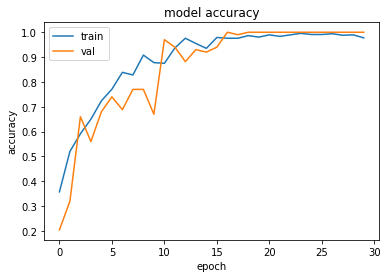

In [38]:
plot_accuracy(history_lstm)

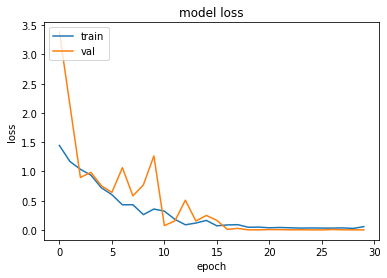

In [39]:
plot_loss(history_lstm)

#### CNN + RNN (GRU )

In [40]:
model_gru = Sequential()


model_gru.add(TimeDistributed(Conv2D(8, (3,3),padding='same',  activation='relu'),input_shape = input_shape))

model_gru.add(TimeDistributed(Conv2D(16, (3,3),padding='same',  activation='relu')))
model_gru.add(TimeDistributed(MaxPooling2D((2,2))))


model_gru.add(TimeDistributed(Conv2D(32, (3,3),padding='same',  activation='relu')))

model_gru.add(TimeDistributed(MaxPooling2D((2,2 ))))


model_gru.add(TimeDistributed(Conv2D(64, (3,3),padding='same',  activation='relu')))
model_gru.add(TimeDistributed(MaxPooling2D((2,2))))


model_gru.add(TimeDistributed(BatchNormalization()))
model_gru.add(Dropout(0.25))

model_gru.add(TimeDistributed(Flatten()))

model_gru.add(Dense(128, activation='relu'))
model_gru.add(Dropout(0.25))
model_gru.add(Dense(64, activation='relu'))
model_gru.add(Dropout(0.25))

        ## using GRU as the RNN model along with softmax as our last layer.
model_gru.add(GRU(128, return_sequences=False))
model_gru.add(Dense(5, activation='softmax')) # using Softmax as last layer
 

In [41]:
optimiser = Adam()
model_gru.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_gru.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_9 (TimeDis  (None, 15, 64, 64, 8)    224       
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, 15, 64, 64, 16)   1168      
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 15, 32, 32, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_12 (TimeDi  (None, 15, 32, 32, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 15, 16, 16, 32)  

In [42]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [43]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
#filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_accuracy:.5f}.h5'
#filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_categorical_accuracy:.5f}.h5'
filepath = model_name + 'GRU' + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{loss:.5f}.h5'
####  val_categorical_accuracy to be replaced by val_accuracy from started guide  ####

print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, cooldown=4, verbose=1,mode='auto',min_delta=0.0001)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]
##earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0,patience=10,verbose=1,mode="auto",baseline=None,restore_best_weights=True,start_from_epoch=0,)
## callbacks_list = [checkpoint, LR, earlystopping]
callbacks_list = [checkpoint, LR]

model_init_2023-05-1216_44_55.658377/GRUmodel-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{loss:.5f}.h5


In [44]:

num_epochs = 30
history_gru = model_gru.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/var/folders/nx/fgfzxpbx7mnbdd9mgv9jsd9w0000gn/T/ipykernel_40967/3990712439.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_gru = model_gru.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/30

Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00001-1.83302-0.00000-1.83302.h5
 1/67 [..............................] - ETA: 4:45 - loss: 1.8330 - categorical_accuracy: 0.0000e+00
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00001-1.61094-0.20000-1.61094.h5
 2/67 [..............................] - ETA: 43s - loss: 1.6109 - categorical_accuracy: 0.2000     
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00001-1.84257-0.13333-1.84257.h5
 3/67 [>.............................] - ETA: 1:01 - loss: 1.8426 - categorical_accuracy: 0.1333
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00001-1.69253-0.20000-1.69253.h5
 4/67 [>.............................] - ETA: 58s - loss: 1.6925 - categorical_accuracy: 0.2000 
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00001-1.62035-0.24000-1.62035.h5
 5/67 [=>............................] - ETA: 59s - loss: 1.6204 - categ

41/67 [=================>............] - ETA: 24s - loss: 1.5215 - categorical_accuracy: 0.3220
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00001-1.51739-0.31905-1.51739.h5
42/67 [=================>............] - ETA: 23s - loss: 1.5174 - categorical_accuracy: 0.3190
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00001-1.50813-0.32093-1.50813.h5
43/67 [==================>...........] - ETA: 22s - loss: 1.5081 - categorical_accuracy: 0.3209
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00001-1.49534-0.32955-1.49534.h5
44/67 [==================>...........] - ETA: 21s - loss: 1.4953 - categorical_accuracy: 0.3295
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00001-1.48640-0.33778-1.48640.h5
45/67 [===================>..........] - ETA: 20s - loss: 1.4864 - categorical_accuracy: 0.3378
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00001-1.48177-0.34348-1.48177.h5


15/67 [=====>........................] - ETA: 48s - loss: 1.0490 - categorical_accuracy: 0.5733
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00002-1.06972-0.55625-1.06972.h5
16/67 [======>.......................] - ETA: 47s - loss: 1.0697 - categorical_accuracy: 0.5562
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00002-1.05258-0.56471-1.05258.h5
17/67 [======>.......................] - ETA: 46s - loss: 1.0526 - categorical_accuracy: 0.5647
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00002-1.06557-0.56111-1.06557.h5
18/67 [=======>......................] - ETA: 45s - loss: 1.0656 - categorical_accuracy: 0.5611
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00002-1.09284-0.54737-1.09284.h5
19/67 [=======>......................] - ETA: 44s - loss: 1.0928 - categorical_accuracy: 0.5474
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00002-1.07851-0.55500-1.07851.h5


56/67 [========================>.....] - ETA: 10s - loss: 1.0112 - categorical_accuracy: 0.5839
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00002-1.01395-0.58246-1.01395.h5
57/67 [========================>.....] - ETA: 9s - loss: 1.0139 - categorical_accuracy: 0.5825 
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00002-1.02123-0.57759-1.02123.h5
58/67 [========================>.....] - ETA: 8s - loss: 1.0212 - categorical_accuracy: 0.5776
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00002-1.01480-0.57966-1.01480.h5
59/67 [=========================>....] - ETA: 7s - loss: 1.0148 - categorical_accuracy: 0.5797
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00002-1.01717-0.57833-1.01717.h5
60/67 [=========================>....] - ETA: 6s - loss: 1.0172 - categorical_accuracy: 0.5783
Epoch 2: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00002-1.02027-0.57869-1.02027.h5
61/

30/67 [============>.................] - ETA: 37s - loss: 0.7831 - categorical_accuracy: 0.6833
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00003-0.78928-0.68387-0.78928.h5
31/67 [============>.................] - ETA: 36s - loss: 0.7893 - categorical_accuracy: 0.6839
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00003-0.78451-0.68750-0.78451.h5
32/67 [=============>................] - ETA: 35s - loss: 0.7845 - categorical_accuracy: 0.6875
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00003-0.78258-0.69091-0.78258.h5
33/67 [=============>................] - ETA: 35s - loss: 0.7826 - categorical_accuracy: 0.6909
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00003-0.78172-0.68529-0.78172.h5
34/67 [==============>...............] - ETA: 34s - loss: 0.7817 - categorical_accuracy: 0.6853
Epoch 3: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00003-0.79449-0.68000-0.79449.h5


 4/67 [>.............................] - ETA: 55s - loss: 0.3736 - categorical_accuracy: 0.9000
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00004-0.41578-0.86000-0.41578.h5
 5/67 [=>............................] - ETA: 1:01 - loss: 0.4158 - categorical_accuracy: 0.8600
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00004-0.43385-0.85000-0.43385.h5
 6/67 [=>............................] - ETA: 1:03 - loss: 0.4338 - categorical_accuracy: 0.8500
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00004-0.47131-0.82857-0.47131.h5
 7/67 [==>...........................] - ETA: 1:02 - loss: 0.4713 - categorical_accuracy: 0.8286
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00004-0.47971-0.81250-0.47971.h5
 8/67 [==>...........................] - ETA: 1:01 - loss: 0.4797 - categorical_accuracy: 0.8125
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00004-0.46565-0.82222-0.46565

45/67 [===================>..........] - ETA: 23s - loss: 0.5433 - categorical_accuracy: 0.8067
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00004-0.54605-0.80652-0.54605.h5
46/67 [===================>..........] - ETA: 22s - loss: 0.5460 - categorical_accuracy: 0.8065
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00004-0.54397-0.80851-0.54397.h5
47/67 [====================>.........] - ETA: 21s - loss: 0.5440 - categorical_accuracy: 0.8085
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00004-0.54512-0.80833-0.54512.h5
48/67 [====================>.........] - ETA: 20s - loss: 0.5451 - categorical_accuracy: 0.8083
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00004-0.54254-0.81020-0.54254.h5
49/67 [====================>.........] - ETA: 19s - loss: 0.5425 - categorical_accuracy: 0.8102
Epoch 4: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00004-0.54467-0.80800-0.54467.h5


19/67 [=======>......................] - ETA: 52s - loss: 0.3254 - categorical_accuracy: 0.8947
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00005-0.32680-0.89000-0.32680.h5
20/67 [=======>......................] - ETA: 51s - loss: 0.3268 - categorical_accuracy: 0.8900
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00005-0.32079-0.89048-0.32079.h5
21/67 [========>.....................] - ETA: 49s - loss: 0.3208 - categorical_accuracy: 0.8905
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00005-0.31230-0.89545-0.31230.h5
22/67 [========>.....................] - ETA: 48s - loss: 0.3123 - categorical_accuracy: 0.8955
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00005-0.30880-0.89565-0.30880.h5
23/67 [=========>....................] - ETA: 47s - loss: 0.3088 - categorical_accuracy: 0.8957
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00005-0.30642-0.89583-0.30642.h5


60/67 [=========================>....] - ETA: 7s - loss: 0.3223 - categorical_accuracy: 0.8867
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00005-0.31937-0.88852-0.31937.h5
61/67 [==========================>...] - ETA: 6s - loss: 0.3194 - categorical_accuracy: 0.8885
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00005-0.32273-0.88548-0.32273.h5
62/67 [==========================>...] - ETA: 5s - loss: 0.3227 - categorical_accuracy: 0.8855
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00005-0.32340-0.88413-0.32340.h5
63/67 [===========================>..] - ETA: 4s - loss: 0.3234 - categorical_accuracy: 0.8841
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00005-0.32299-0.88281-0.32299.h5
64/67 [===========================>..] - ETA: 3s - loss: 0.3230 - categorical_accuracy: 0.8828
Epoch 5: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00005-0.32534-0.88180-0.32534.h5
65/67

34/67 [==============>...............] - ETA: 32s - loss: 0.3181 - categorical_accuracy: 0.8824
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00006-0.31706-0.88286-0.31706.h5
35/67 [==============>...............] - ETA: 31s - loss: 0.3171 - categorical_accuracy: 0.8829
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00006-0.32231-0.87778-0.32231.h5
36/67 [===============>..............] - ETA: 30s - loss: 0.3223 - categorical_accuracy: 0.8778
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00006-0.32505-0.87838-0.32505.h5
37/67 [===============>..............] - ETA: 29s - loss: 0.3250 - categorical_accuracy: 0.8784
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00006-0.33057-0.87632-0.33057.h5
38/67 [================>.............] - ETA: 28s - loss: 0.3306 - categorical_accuracy: 0.8763
Epoch 6: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00006-0.32794-0.87692-0.32794.h5


 8/67 [==>...........................] - ETA: 51s - loss: 0.3998 - categorical_accuracy: 0.8625
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00007-0.36058-0.87778-0.36058.h5
 9/67 [===>..........................] - ETA: 52s - loss: 0.3606 - categorical_accuracy: 0.8778
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00007-0.32696-0.89000-0.32696.h5
10/67 [===>..........................] - ETA: 52s - loss: 0.3270 - categorical_accuracy: 0.8900
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00007-0.31350-0.89091-0.31350.h5
11/67 [===>..........................] - ETA: 56s - loss: 0.3135 - categorical_accuracy: 0.8909
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00007-0.32288-0.88333-0.32288.h5
12/67 [====>.........................] - ETA: 57s - loss: 0.3229 - categorical_accuracy: 0.8833
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00007-0.31765-0.87692-0.31765.h5


49/67 [====================>.........] - ETA: 17s - loss: 0.2778 - categorical_accuracy: 0.8918
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00007-0.27556-0.89200-0.27556.h5
50/67 [=====================>........] - ETA: 16s - loss: 0.2756 - categorical_accuracy: 0.8920
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00007-0.27124-0.89412-0.27124.h5
51/67 [=====================>........] - ETA: 15s - loss: 0.2712 - categorical_accuracy: 0.8941
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00007-0.27313-0.89423-0.27313.h5
52/67 [======================>.......] - ETA: 14s - loss: 0.2731 - categorical_accuracy: 0.8942
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00007-0.27369-0.89245-0.27369.h5
53/67 [======================>.......] - ETA: 13s - loss: 0.2737 - categorical_accuracy: 0.8925
Epoch 7: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00007-0.27084-0.89444-0.27084.h5


23/67 [=========>....................] - ETA: 42s - loss: 0.1072 - categorical_accuracy: 0.9783
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00008-0.10357-0.97917-0.10357.h5
24/67 [=========>....................] - ETA: 41s - loss: 0.1036 - categorical_accuracy: 0.9792
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00008-0.10093-0.98000-0.10093.h5
25/67 [==========>...................] - ETA: 41s - loss: 0.1009 - categorical_accuracy: 0.9800
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00008-0.10423-0.98077-0.10423.h5
26/67 [==========>...................] - ETA: 40s - loss: 0.1042 - categorical_accuracy: 0.9808
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00008-0.10152-0.98148-0.10152.h5
27/67 [===========>..................] - ETA: 39s - loss: 0.1015 - categorical_accuracy: 0.9815
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00008-0.09843-0.98214-0.09843.h5


64/67 [===========================>..] - ETA: 3s - loss: 0.0789 - categorical_accuracy: 0.9812
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00008-0.07851-0.98134-0.07851.h5
65/67 [============================>.] - ETA: 2s - loss: 0.0785 - categorical_accuracy: 0.9813
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00008-0.07768-0.98162-0.07768.h5
66/67 [============================>.] - ETA: 1s - loss: 0.0777 - categorical_accuracy: 0.9816
Epoch 8: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00008-0.07667-0.98190-0.07667.h5
67/67 [==============================] - 92s 1s/step - loss: 0.0767 - categorical_accuracy: 0.9819 - val_loss: 0.2803 - val_categorical_accuracy: 0.9200 - lr: 0.0010
Epoch 9/30

Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00009-0.02260-1.00000-0.02260.h5
 1/67 [..............................] - ETA: 31s - loss: 0.0226 - categorical_accuracy: 1.0000
Epoch 9: saving model to 

38/67 [================>.............] - ETA: 29s - loss: 0.0261 - categorical_accuracy: 1.0000
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00009-0.02643-1.00000-0.02643.h5
39/67 [================>.............] - ETA: 28s - loss: 0.0264 - categorical_accuracy: 1.0000
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00009-0.02669-1.00000-0.02669.h5
40/67 [================>.............] - ETA: 27s - loss: 0.0267 - categorical_accuracy: 1.0000
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00009-0.02614-1.00000-0.02614.h5
41/67 [=================>............] - ETA: 26s - loss: 0.0261 - categorical_accuracy: 1.0000
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00009-0.02561-1.00000-0.02561.h5
42/67 [=================>............] - ETA: 26s - loss: 0.0256 - categorical_accuracy: 1.0000
Epoch 9: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00009-0.02645-1.00000-0.02645.h5


12/67 [====>.........................] - ETA: 49s - loss: 0.0282 - categorical_accuracy: 0.9750
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00010-0.03707-0.96923-0.03707.h5
13/67 [====>.........................] - ETA: 48s - loss: 0.0371 - categorical_accuracy: 0.9692
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00010-0.03512-0.97143-0.03512.h5
14/67 [=====>........................] - ETA: 47s - loss: 0.0351 - categorical_accuracy: 0.9714
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00010-0.03483-0.97333-0.03483.h5
15/67 [=====>........................] - ETA: 46s - loss: 0.0348 - categorical_accuracy: 0.9733
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00010-0.03296-0.97500-0.03296.h5
16/67 [======>.......................] - ETA: 44s - loss: 0.0330 - categorical_accuracy: 0.9750
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00010-0.03240-0.97647-0.0324

53/67 [======================>.......] - ETA: 15s - loss: 0.0482 - categorical_accuracy: 0.9792
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00010-0.04775-0.97963-0.04775.h5
54/67 [=======================>......] - ETA: 14s - loss: 0.0478 - categorical_accuracy: 0.9796
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00010-0.05091-0.97818-0.05091.h5
55/67 [=======================>......] - ETA: 13s - loss: 0.0509 - categorical_accuracy: 0.9782
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00010-0.05194-0.97679-0.05194.h5
56/67 [========================>.....] - ETA: 11s - loss: 0.0519 - categorical_accuracy: 0.9768
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00010-0.05328-0.97544-0.05328.h5
57/67 [========================>.....] - ETA: 10s - loss: 0.0533 - categorical_accuracy: 0.9754
Epoch 10: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00010-0.05255-0.97586-0.0525

26/67 [==========>...................] - ETA: 43s - loss: 0.0720 - categorical_accuracy: 0.9769
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00011-0.06962-0.97778-0.06962.h5
27/67 [===========>..................] - ETA: 41s - loss: 0.0696 - categorical_accuracy: 0.9778
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00011-0.07541-0.97143-0.07541.h5
28/67 [===========>..................] - ETA: 41s - loss: 0.0754 - categorical_accuracy: 0.9714
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00011-0.07320-0.97241-0.07320.h5
29/67 [===========>..................] - ETA: 39s - loss: 0.0732 - categorical_accuracy: 0.9724
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00011-0.07122-0.97333-0.07122.h5
30/67 [============>.................] - ETA: 38s - loss: 0.0712 - categorical_accuracy: 0.9733
Epoch 11: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00011-0.06955-0.97419-0.0695

67/67 [==============================] - 75s 1s/step - loss: 0.0911 - categorical_accuracy: 0.9698 - val_loss: 0.4581 - val_categorical_accuracy: 0.8900 - lr: 0.0010
Epoch 12/30

Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00012-0.00940-1.00000-0.00940.h5
 1/67 [..............................] - ETA: 27s - loss: 0.0094 - categorical_accuracy: 1.0000
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00012-0.04953-1.00000-0.04953.h5
 2/67 [..............................] - ETA: 45s - loss: 0.0495 - categorical_accuracy: 1.0000
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00012-0.04305-1.00000-0.04305.h5
 3/67 [>.............................] - ETA: 44s - loss: 0.0431 - categorical_accuracy: 1.0000
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00012-0.07507-0.97500-0.07507.h5
 4/67 [>.............................] - ETA: 50s - loss: 0.0751 - categorical_accuracy: 0.9750
Epoch 12: saving 

40/67 [================>.............] - ETA: 34s - loss: 0.1204 - categorical_accuracy: 0.9575
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00012-0.11797-0.95854-0.11797.h5
41/67 [=================>............] - ETA: 33s - loss: 0.1180 - categorical_accuracy: 0.9585
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00012-0.11620-0.95952-0.11620.h5
42/67 [=================>............] - ETA: 31s - loss: 0.1162 - categorical_accuracy: 0.9595
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00012-0.13902-0.95349-0.13902.h5
43/67 [==================>...........] - ETA: 30s - loss: 0.1390 - categorical_accuracy: 0.9535
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00012-0.13864-0.95227-0.13864.h5
44/67 [==================>...........] - ETA: 29s - loss: 0.1386 - categorical_accuracy: 0.9523
Epoch 12: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00012-0.14062-0.95333-0.1406

12/67 [====>.........................] - ETA: 1:27 - loss: 0.0745 - categorical_accuracy: 0.9750
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00013-0.07630-0.96923-0.07630.h5
13/67 [====>.........................] - ETA: 1:22 - loss: 0.0763 - categorical_accuracy: 0.9692
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00013-0.07174-0.97143-0.07174.h5
14/67 [=====>........................] - ETA: 1:18 - loss: 0.0717 - categorical_accuracy: 0.9714
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00013-0.07099-0.97333-0.07099.h5
15/67 [=====>........................] - ETA: 1:14 - loss: 0.0710 - categorical_accuracy: 0.9733
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00013-0.06983-0.97500-0.06983.h5
16/67 [======>.......................] - ETA: 1:11 - loss: 0.0698 - categorical_accuracy: 0.9750
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00013-0.06693-0.97647-0

53/67 [======================>.......] - ETA: 21s - loss: 0.0924 - categorical_accuracy: 0.9642
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00013-0.09214-0.96481-0.09214.h5
54/67 [=======================>......] - ETA: 20s - loss: 0.0921 - categorical_accuracy: 0.9648
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00013-0.09171-0.96545-0.09171.h5
55/67 [=======================>......] - ETA: 18s - loss: 0.0917 - categorical_accuracy: 0.9655
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00013-0.09031-0.96607-0.09031.h5
56/67 [========================>.....] - ETA: 16s - loss: 0.0903 - categorical_accuracy: 0.9661
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00013-0.09623-0.96491-0.09623.h5
57/67 [========================>.....] - ETA: 15s - loss: 0.0962 - categorical_accuracy: 0.9649
Epoch 13: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00013-0.09504-0.96552-0.0950

26/67 [==========>...................] - ETA: 34s - loss: 0.1098 - categorical_accuracy: 0.9577
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00014-0.10665-0.95926-0.10665.h5
27/67 [===========>..................] - ETA: 33s - loss: 0.1067 - categorical_accuracy: 0.9593
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00014-0.10522-0.96071-0.10522.h5
28/67 [===========>..................] - ETA: 33s - loss: 0.1052 - categorical_accuracy: 0.9607
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00014-0.10184-0.96207-0.10184.h5
29/67 [===========>..................] - ETA: 32s - loss: 0.1018 - categorical_accuracy: 0.9621
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00014-0.09996-0.96333-0.09996.h5
30/67 [============>.................] - ETA: 31s - loss: 0.1000 - categorical_accuracy: 0.9633
Epoch 14: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00014-0.09696-0.96452-0.0969

67/67 [==============================] - 68s 1s/step - loss: 0.0827 - categorical_accuracy: 0.9713 - val_loss: 0.0107 - val_categorical_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 15/30

Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00015-0.01445-1.00000-0.01445.h5
 1/67 [..............................] - ETA: 32s - loss: 0.0144 - categorical_accuracy: 1.0000
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00015-0.05548-1.00000-0.05548.h5
 2/67 [..............................] - ETA: 43s - loss: 0.0555 - categorical_accuracy: 1.0000
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00015-0.04484-1.00000-0.04484.h5
 3/67 [>.............................] - ETA: 48s - loss: 0.0448 - categorical_accuracy: 1.0000
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00015-0.03484-1.00000-0.03484.h5
 4/67 [>.............................] - ETA: 49s - loss: 0.0348 - categorical_accuracy: 1.0000
Epoch 15: sav

40/67 [================>.............] - ETA: 25s - loss: 0.0690 - categorical_accuracy: 0.9850
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00015-0.07137-0.98293-0.07137.h5
41/67 [=================>............] - ETA: 24s - loss: 0.0714 - categorical_accuracy: 0.9829
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00015-0.07011-0.98333-0.07011.h5
42/67 [=================>............] - ETA: 23s - loss: 0.0701 - categorical_accuracy: 0.9833
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00015-0.07021-0.98372-0.07021.h5
43/67 [==================>...........] - ETA: 22s - loss: 0.0702 - categorical_accuracy: 0.9837
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00015-0.06912-0.98409-0.06912.h5
44/67 [==================>...........] - ETA: 21s - loss: 0.0691 - categorical_accuracy: 0.9841
Epoch 15: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00015-0.06776-0.98444-0.0677

13/67 [====>.........................] - ETA: 46s - loss: 0.0633 - categorical_accuracy: 0.9769
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00016-0.05939-0.97857-0.05939.h5
14/67 [=====>........................] - ETA: 45s - loss: 0.0594 - categorical_accuracy: 0.9786
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00016-0.05562-0.98000-0.05562.h5
15/67 [=====>........................] - ETA: 44s - loss: 0.0556 - categorical_accuracy: 0.9800
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00016-0.05287-0.98125-0.05287.h5
16/67 [======>.......................] - ETA: 42s - loss: 0.0529 - categorical_accuracy: 0.9812
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00016-0.04992-0.98235-0.04992.h5
17/67 [======>.......................] - ETA: 41s - loss: 0.0499 - categorical_accuracy: 0.9824
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00016-0.05397-0.97778-0.0539

54/67 [=======================>......] - ETA: 10s - loss: 0.0404 - categorical_accuracy: 0.9889
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00016-0.03979-0.98909-0.03979.h5
55/67 [=======================>......] - ETA: 10s - loss: 0.0398 - categorical_accuracy: 0.9891
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00016-0.03920-0.98929-0.03920.h5
56/67 [========================>.....] - ETA: 9s - loss: 0.0392 - categorical_accuracy: 0.9893 
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00016-0.03896-0.98947-0.03896.h5
57/67 [========================>.....] - ETA: 8s - loss: 0.0390 - categorical_accuracy: 0.9895
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00016-0.03837-0.98966-0.03837.h5
58/67 [========================>.....] - ETA: 7s - loss: 0.0384 - categorical_accuracy: 0.9897
Epoch 16: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00016-0.03844-0.98983-0.03844.

27/67 [===========>..................] - ETA: 41s - loss: 0.0304 - categorical_accuracy: 1.0000
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00017-0.02953-1.00000-0.02953.h5
28/67 [===========>..................] - ETA: 39s - loss: 0.0295 - categorical_accuracy: 1.0000
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00017-0.02955-1.00000-0.02955.h5
29/67 [===========>..................] - ETA: 38s - loss: 0.0296 - categorical_accuracy: 1.0000
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00017-0.02893-1.00000-0.02893.h5
30/67 [============>.................] - ETA: 37s - loss: 0.0289 - categorical_accuracy: 1.0000
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00017-0.02853-1.00000-0.02853.h5
31/67 [============>.................] - ETA: 36s - loss: 0.0285 - categorical_accuracy: 1.0000
Epoch 17: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00017-0.02826-1.00000-0.0282

Epoch 18/30

Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00018-0.01437-1.00000-0.01437.h5
 1/67 [..............................] - ETA: 26s - loss: 0.0144 - categorical_accuracy: 1.0000
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00018-0.05610-0.95000-0.05610.h5
 2/67 [..............................] - ETA: 59s - loss: 0.0561 - categorical_accuracy: 0.9500
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00018-0.03916-0.96667-0.03916.h5
 3/67 [>.............................] - ETA: 54s - loss: 0.0392 - categorical_accuracy: 0.9667
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00018-0.07684-0.95000-0.07684.h5
 4/67 [>.............................] - ETA: 55s - loss: 0.0768 - categorical_accuracy: 0.9500
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00018-0.06601-0.96000-0.06601.h5
 5/67 [=>............................] - ETA: 57s - loss: 0.0660 - categorical

41/67 [=================>............] - ETA: 29s - loss: 0.0404 - categorical_accuracy: 0.9829
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00018-0.04190-0.98333-0.04190.h5
42/67 [=================>............] - ETA: 28s - loss: 0.0419 - categorical_accuracy: 0.9833
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00018-0.04250-0.98372-0.04250.h5
43/67 [==================>...........] - ETA: 27s - loss: 0.0425 - categorical_accuracy: 0.9837
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00018-0.04169-0.98409-0.04169.h5
44/67 [==================>...........] - ETA: 26s - loss: 0.0417 - categorical_accuracy: 0.9841
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00018-0.04089-0.98444-0.04089.h5
45/67 [===================>..........] - ETA: 24s - loss: 0.0409 - categorical_accuracy: 0.9844
Epoch 18: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00018-0.04067-0.98478-0.0406

14/67 [=====>........................] - ETA: 52s - loss: 0.0313 - categorical_accuracy: 0.9929
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00019-0.03137-0.99333-0.03137.h5
15/67 [=====>........................] - ETA: 51s - loss: 0.0314 - categorical_accuracy: 0.9933
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00019-0.03135-0.99375-0.03135.h5
16/67 [======>.......................] - ETA: 51s - loss: 0.0313 - categorical_accuracy: 0.9937
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00019-0.02990-0.99412-0.02990.h5
17/67 [======>.......................] - ETA: 50s - loss: 0.0299 - categorical_accuracy: 0.9941
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00019-0.02962-0.99444-0.02962.h5
18/67 [=======>......................] - ETA: 49s - loss: 0.0296 - categorical_accuracy: 0.9944
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00019-0.02947-0.99474-0.0294

55/67 [=======================>......] - ETA: 12s - loss: 0.0286 - categorical_accuracy: 0.9909
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00019-0.02820-0.99107-0.02820.h5
56/67 [========================>.....] - ETA: 11s - loss: 0.0282 - categorical_accuracy: 0.9911
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00019-0.02792-0.99123-0.02792.h5
57/67 [========================>.....] - ETA: 10s - loss: 0.0279 - categorical_accuracy: 0.9912
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00019-0.02819-0.99138-0.02819.h5
58/67 [========================>.....] - ETA: 9s - loss: 0.0282 - categorical_accuracy: 0.9914 
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00019-0.03209-0.98983-0.03209.h5
59/67 [=========================>....] - ETA: 8s - loss: 0.0321 - categorical_accuracy: 0.9898
Epoch 19: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00019-0.03197-0.99000-0.03197

28/67 [===========>..................] - ETA: 42s - loss: 0.0327 - categorical_accuracy: 0.9857
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00020-0.03206-0.98621-0.03206.h5
29/67 [===========>..................] - ETA: 41s - loss: 0.0321 - categorical_accuracy: 0.9862
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00020-0.03224-0.98667-0.03224.h5
30/67 [============>.................] - ETA: 40s - loss: 0.0322 - categorical_accuracy: 0.9867
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00020-0.03180-0.98710-0.03180.h5
31/67 [============>.................] - ETA: 39s - loss: 0.0318 - categorical_accuracy: 0.9871
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00020-0.03118-0.98750-0.03118.h5
32/67 [=============>................] - ETA: 38s - loss: 0.0312 - categorical_accuracy: 0.9875
Epoch 20: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00020-0.03094-0.98788-0.0309

 1/67 [..............................] - ETA: 28s - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00021-0.00867-1.00000-0.00867.h5
 2/67 [..............................] - ETA: 1:08 - loss: 0.0087 - categorical_accuracy: 1.0000
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00021-0.00753-1.00000-0.00753.h5
 3/67 [>.............................] - ETA: 1:14 - loss: 0.0075 - categorical_accuracy: 1.0000
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00021-0.02139-1.00000-0.02139.h5
 4/67 [>.............................] - ETA: 1:11 - loss: 0.0214 - categorical_accuracy: 1.0000
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00021-0.02302-1.00000-0.02302.h5
 5/67 [=>............................] - ETA: 1:11 - loss: 0.0230 - categorical_accuracy: 1.0000
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00021-0.02074-1.00000-0.

42/67 [=================>............] - ETA: 27s - loss: 0.0225 - categorical_accuracy: 0.9952
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00021-0.02300-0.99535-0.02300.h5
43/67 [==================>...........] - ETA: 25s - loss: 0.0230 - categorical_accuracy: 0.9953
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00021-0.02575-0.99318-0.02575.h5
44/67 [==================>...........] - ETA: 24s - loss: 0.0257 - categorical_accuracy: 0.9932
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00021-0.02585-0.99333-0.02585.h5
45/67 [===================>..........] - ETA: 23s - loss: 0.0259 - categorical_accuracy: 0.9933
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00021-0.02580-0.99348-0.02580.h5
46/67 [===================>..........] - ETA: 22s - loss: 0.0258 - categorical_accuracy: 0.9935
Epoch 21: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00021-0.02603-0.99362-0.0260

15/67 [=====>........................] - ETA: 48s - loss: 0.0428 - categorical_accuracy: 0.9867
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00022-0.04092-0.98750-0.04092.h5
16/67 [======>.......................] - ETA: 47s - loss: 0.0409 - categorical_accuracy: 0.9875
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00022-0.03894-0.98824-0.03894.h5
17/67 [======>.......................] - ETA: 46s - loss: 0.0389 - categorical_accuracy: 0.9882
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00022-0.03736-0.98889-0.03736.h5
18/67 [=======>......................] - ETA: 44s - loss: 0.0374 - categorical_accuracy: 0.9889
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00022-0.03586-0.98947-0.03586.h5
19/67 [=======>......................] - ETA: 42s - loss: 0.0359 - categorical_accuracy: 0.9895
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00022-0.03552-0.99000-0.0355

56/67 [========================>.....] - ETA: 10s - loss: 0.0249 - categorical_accuracy: 0.9946
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00022-0.02461-0.99474-0.02461.h5
57/67 [========================>.....] - ETA: 9s - loss: 0.0246 - categorical_accuracy: 0.9947 
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00022-0.02470-0.99483-0.02470.h5
58/67 [========================>.....] - ETA: 8s - loss: 0.0247 - categorical_accuracy: 0.9948
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00022-0.02439-0.99492-0.02439.h5
59/67 [=========================>....] - ETA: 7s - loss: 0.0244 - categorical_accuracy: 0.9949
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00022-0.02425-0.99500-0.02425.h5
60/67 [=========================>....] - ETA: 6s - loss: 0.0242 - categorical_accuracy: 0.9950
Epoch 22: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00022-0.02432-0.99508-0.02432.h

29/67 [===========>..................] - ETA: 27s - loss: 0.0178 - categorical_accuracy: 1.0000
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00023-0.01956-1.00000-0.01956.h5
30/67 [============>.................] - ETA: 26s - loss: 0.0196 - categorical_accuracy: 1.0000
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00023-0.01989-1.00000-0.01989.h5
31/67 [============>.................] - ETA: 25s - loss: 0.0199 - categorical_accuracy: 1.0000
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00023-0.01933-1.00000-0.01933.h5
32/67 [=============>................] - ETA: 24s - loss: 0.0193 - categorical_accuracy: 1.0000
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00023-0.01897-1.00000-0.01897.h5
33/67 [=============>................] - ETA: 24s - loss: 0.0190 - categorical_accuracy: 1.0000
Epoch 23: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00023-0.01863-1.00000-0.0186

 2/67 [..............................] - ETA: 51s - loss: 0.0195 - categorical_accuracy: 1.0000
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00024-0.01451-1.00000-0.01451.h5
 3/67 [>.............................] - ETA: 45s - loss: 0.0145 - categorical_accuracy: 1.0000
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00024-0.01278-1.00000-0.01278.h5
 4/67 [>.............................] - ETA: 44s - loss: 0.0128 - categorical_accuracy: 1.0000
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00024-0.01225-1.00000-0.01225.h5
 5/67 [=>............................] - ETA: 44s - loss: 0.0123 - categorical_accuracy: 1.0000
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00024-0.02261-1.00000-0.02261.h5
 6/67 [=>............................] - ETA: 44s - loss: 0.0226 - categorical_accuracy: 1.0000
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00024-0.02134-1.00000-0.0213

43/67 [==================>...........] - ETA: 17s - loss: 0.0199 - categorical_accuracy: 0.9953
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00024-0.01963-0.99545-0.01963.h5
44/67 [==================>...........] - ETA: 16s - loss: 0.0196 - categorical_accuracy: 0.9955
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00024-0.01983-0.99556-0.01983.h5
45/67 [===================>..........] - ETA: 15s - loss: 0.0198 - categorical_accuracy: 0.9956
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00024-0.01944-0.99565-0.01944.h5
46/67 [===================>..........] - ETA: 14s - loss: 0.0194 - categorical_accuracy: 0.9957
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00024-0.02068-0.99574-0.02068.h5
47/67 [====================>.........] - ETA: 14s - loss: 0.0207 - categorical_accuracy: 0.9957
Epoch 24: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00024-0.02084-0.99583-0.0208

16/67 [======>.......................] - ETA: 37s - loss: 0.0268 - categorical_accuracy: 0.9937
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00025-0.02737-0.99412-0.02737.h5
17/67 [======>.......................] - ETA: 36s - loss: 0.0274 - categorical_accuracy: 0.9941
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00025-0.02725-0.99444-0.02725.h5
18/67 [=======>......................] - ETA: 36s - loss: 0.0273 - categorical_accuracy: 0.9944
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00025-0.02609-0.99474-0.02609.h5
19/67 [=======>......................] - ETA: 35s - loss: 0.0261 - categorical_accuracy: 0.9947
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00025-0.02579-0.99500-0.02579.h5
20/67 [=======>......................] - ETA: 34s - loss: 0.0258 - categorical_accuracy: 0.9950
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00025-0.02487-0.99524-0.0248

57/67 [========================>.....] - ETA: 7s - loss: 0.0260 - categorical_accuracy: 0.9965
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00025-0.02560-0.99655-0.02560.h5
58/67 [========================>.....] - ETA: 6s - loss: 0.0256 - categorical_accuracy: 0.9966
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00025-0.02541-0.99661-0.02541.h5
59/67 [=========================>....] - ETA: 5s - loss: 0.0254 - categorical_accuracy: 0.9966
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00025-0.02516-0.99667-0.02516.h5
60/67 [=========================>....] - ETA: 5s - loss: 0.0252 - categorical_accuracy: 0.9967
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00025-0.02801-0.99344-0.02801.h5
61/67 [==========================>...] - ETA: 4s - loss: 0.0280 - categorical_accuracy: 0.9934
Epoch 25: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00025-0.02867-0.99355-0.02867.h5


30/67 [============>.................] - ETA: 27s - loss: 0.0220 - categorical_accuracy: 1.0000
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00026-0.02132-1.00000-0.02132.h5
31/67 [============>.................] - ETA: 26s - loss: 0.0213 - categorical_accuracy: 1.0000
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00026-0.02145-1.00000-0.02145.h5
32/67 [=============>................] - ETA: 25s - loss: 0.0214 - categorical_accuracy: 1.0000
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00026-0.02094-1.00000-0.02094.h5
33/67 [=============>................] - ETA: 25s - loss: 0.0209 - categorical_accuracy: 1.0000
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00026-0.02056-1.00000-0.02056.h5
34/67 [==============>...............] - ETA: 24s - loss: 0.0206 - categorical_accuracy: 1.0000
Epoch 26: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00026-0.02296-0.99714-0.0229

 3/67 [>.............................] - ETA: 47s - loss: 0.0204 - categorical_accuracy: 1.0000
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00027-0.02515-1.00000-0.02515.h5
 4/67 [>.............................] - ETA: 47s - loss: 0.0252 - categorical_accuracy: 1.0000
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00027-0.02117-1.00000-0.02117.h5
 5/67 [=>............................] - ETA: 44s - loss: 0.0212 - categorical_accuracy: 1.0000
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00027-0.01848-1.00000-0.01848.h5
 6/67 [=>............................] - ETA: 43s - loss: 0.0185 - categorical_accuracy: 1.0000
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00027-0.01755-1.00000-0.01755.h5
 7/67 [==>...........................] - ETA: 43s - loss: 0.0176 - categorical_accuracy: 1.0000
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00027-0.02027-1.00000-0.0202

44/67 [==================>...........] - ETA: 16s - loss: 0.0225 - categorical_accuracy: 1.0000
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00027-0.02334-1.00000-0.02334.h5
45/67 [===================>..........] - ETA: 15s - loss: 0.0233 - categorical_accuracy: 1.0000
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00027-0.02370-1.00000-0.02370.h5
46/67 [===================>..........] - ETA: 15s - loss: 0.0237 - categorical_accuracy: 1.0000
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00027-0.02332-1.00000-0.02332.h5
47/67 [====================>.........] - ETA: 14s - loss: 0.0233 - categorical_accuracy: 1.0000
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00027-0.02285-1.00000-0.02285.h5
48/67 [====================>.........] - ETA: 13s - loss: 0.0229 - categorical_accuracy: 1.0000
Epoch 27: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00027-0.02249-1.00000-0.0224

17/67 [======>.......................] - ETA: 36s - loss: 0.0275 - categorical_accuracy: 0.9882
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00028-0.02659-0.98889-0.02659.h5
18/67 [=======>......................] - ETA: 36s - loss: 0.0266 - categorical_accuracy: 0.9889
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00028-0.02530-0.98947-0.02530.h5
19/67 [=======>......................] - ETA: 35s - loss: 0.0253 - categorical_accuracy: 0.9895
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00028-0.02502-0.99000-0.02502.h5
20/67 [=======>......................] - ETA: 35s - loss: 0.0250 - categorical_accuracy: 0.9900
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00028-0.02502-0.99048-0.02502.h5
21/67 [========>.....................] - ETA: 34s - loss: 0.0250 - categorical_accuracy: 0.9905
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00028-0.02420-0.99091-0.0242

58/67 [========================>.....] - ETA: 6s - loss: 0.0236 - categorical_accuracy: 0.9948
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00028-0.02447-0.99492-0.02447.h5
59/67 [=========================>....] - ETA: 5s - loss: 0.0245 - categorical_accuracy: 0.9949
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00028-0.02413-0.99500-0.02413.h5
60/67 [=========================>....] - ETA: 5s - loss: 0.0241 - categorical_accuracy: 0.9950
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00028-0.02882-0.99344-0.02882.h5
61/67 [==========================>...] - ETA: 4s - loss: 0.0288 - categorical_accuracy: 0.9934
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00028-0.02842-0.99355-0.02842.h5
62/67 [==========================>...] - ETA: 3s - loss: 0.0284 - categorical_accuracy: 0.9935
Epoch 28: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00028-0.02817-0.99365-0.02817.h5


31/67 [============>.................] - ETA: 26s - loss: 0.0334 - categorical_accuracy: 0.9871
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00029-0.03243-0.98750-0.03243.h5
32/67 [=============>................] - ETA: 25s - loss: 0.0324 - categorical_accuracy: 0.9875
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00029-0.03162-0.98788-0.03162.h5
33/67 [=============>................] - ETA: 24s - loss: 0.0316 - categorical_accuracy: 0.9879
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00029-0.03082-0.98824-0.03082.h5
34/67 [==============>...............] - ETA: 24s - loss: 0.0308 - categorical_accuracy: 0.9882
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00029-0.03044-0.98857-0.03044.h5
35/67 [==============>...............] - ETA: 23s - loss: 0.0304 - categorical_accuracy: 0.9886
Epoch 29: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00029-0.03033-0.98889-0.0303

 4/67 [>.............................] - ETA: 46s - loss: 0.0506 - categorical_accuracy: 1.0000
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00030-0.04089-1.00000-0.04089.h5
 5/67 [=>............................] - ETA: 44s - loss: 0.0409 - categorical_accuracy: 1.0000
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00030-0.03543-1.00000-0.03543.h5
 6/67 [=>............................] - ETA: 44s - loss: 0.0354 - categorical_accuracy: 1.0000
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00030-0.03059-1.00000-0.03059.h5
 7/67 [==>...........................] - ETA: 44s - loss: 0.0306 - categorical_accuracy: 1.0000
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00030-0.02945-1.00000-0.02945.h5
 8/67 [==>...........................] - ETA: 44s - loss: 0.0295 - categorical_accuracy: 1.0000
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00030-0.02714-1.00000-0.0271

45/67 [===================>..........] - ETA: 17s - loss: 0.0221 - categorical_accuracy: 0.9956
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00030-0.02187-0.99565-0.02187.h5
46/67 [===================>..........] - ETA: 16s - loss: 0.0219 - categorical_accuracy: 0.9957
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00030-0.02174-0.99574-0.02174.h5
47/67 [====================>.........] - ETA: 15s - loss: 0.0217 - categorical_accuracy: 0.9957
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00030-0.02347-0.99375-0.02347.h5
48/67 [====================>.........] - ETA: 15s - loss: 0.0235 - categorical_accuracy: 0.9937
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00030-0.02309-0.99388-0.02309.h5
49/67 [====================>.........] - ETA: 14s - loss: 0.0231 - categorical_accuracy: 0.9939
Epoch 30: saving model to model_init_2023-05-1216_44_55.658377/GRUmodel-00030-0.02305-0.99400-0.0230

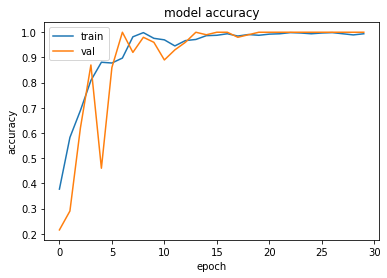

In [45]:
plot_accuracy(history_gru)

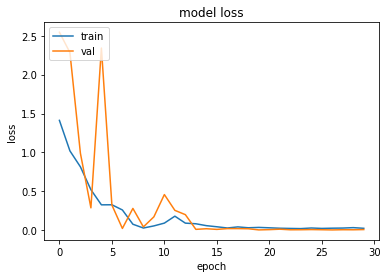

In [46]:
plot_loss(history_gru)

#### Transfer learning mobilenet + GRU

In [63]:
### generator(source_path, folder_list, batch_size,no_of_frames=15,dim_y=128,dim_z=128,verify=False):
no_of_frames=15
batch_size=10
dim_y=128 ## mobilenet can only accept 128 and so on . So changing to 128 
dim_z=128
train_generator_transfer = generator(train_path, train_doc,no_of_frames=no_of_frames,batch_size=batch_size,dim_y=dim_y,dim_z=dim_z)
val_generator_transfer = generator(train_path, train_doc,no_of_frames=no_of_frames,batch_size=batch_size,dim_y=dim_y,dim_z=dim_z)

In [64]:

mnet =tf.keras.applications.MobileNet(
    include_top=False,
    weights='imagenet',
    input_shape=(128, 128, 3)
)

In [65]:
for layer in mnet.layers:
    layer.trainable = False

In [66]:
model_transfer_learning = Sequential()

model_transfer_learning.add(
    TimeDistributed(mnet, input_shape=(no_of_frames, 128, 128, 3))
)

model_transfer_learning.add(Dropout(.5))


model_transfer_learning.add(TimeDistributed(Flatten()))

model_transfer_learning.add(Dropout(.5))

model_transfer_learning.add(GRU(512,activation='relu', return_sequences=False))

# finalize with standard Dense, Dropout...
model_transfer_learning.add(Dropout(.5))

model_transfer_learning.add(Dense(256, activation='relu'))

model_transfer_learning.add(Dropout(.5))

model_transfer_learning.add(Dense(5, activation='softmax'))

In [67]:
optimiser =optimizers.Adam(lr=.001) #write your optimizer
model_transfer_learning.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model_transfer_learning.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_22 (TimeDi  (None, 15, 4, 4, 1024)   3228864   
 stributed)                                                      
                                                                 
 dropout_20 (Dropout)        (None, 15, 4, 4, 1024)    0         
                                                                 
 time_distributed_23 (TimeDi  (None, 15, 16384)        0         
 stributed)                                                      
                                                                 
 dropout_21 (Dropout)        (None, 15, 16384)         0         
                                                                 
 gru_3 (GRU)                 (None, 512)               25955328  
                                                                 
 dropout_22 (Dropout)        (None, 512)              

In [68]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [69]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
#filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_accuracy:.5f}.h5'
#filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_categorical_accuracy:.5f}.h5'
filepath = model_name + 'Transfer' + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{loss:.5f}.h5'
####  val_categorical_accuracy to be replaced by val_accuracy from started guide  ####

print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, cooldown=4, verbose=1,mode='auto',min_delta=0.0001)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]
##earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0,patience=10,verbose=1,mode="auto",baseline=None,restore_best_weights=True,start_from_epoch=0,)
## callbacks_list = [checkpoint, LR, earlystopping]
callbacks_list = [checkpoint, LR]

model_init_2023-05-1216_44_55.658377/Transfermodel-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{loss:.5f}.h5


In [71]:
num_epochs = 20
history_transfer_learning = model_transfer_learning.fit_generator(train_generator_transfer, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/var/folders/nx/fgfzxpbx7mnbdd9mgv9jsd9w0000gn/T/ipykernel_40967/3235430399.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_transfer_learning = model_transfer_learning.fit_generator(train_generator_transfer, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/20

Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/Transfermodel-00001-1.06333-0.40000-1.06333.h5
 1/67 [..............................] - ETA: 2:23 - loss: 1.0633 - categorical_accuracy: 0.4000
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/Transfermodel-00001-1.38849-0.30000-1.38849.h5
 2/67 [..............................] - ETA: 2:09 - loss: 1.3885 - categorical_accuracy: 0.3000
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/Transfermodel-00001-1.35148-0.36667-1.35148.h5
 3/67 [>.............................] - ETA: 2:10 - loss: 1.3515 - categorical_accuracy: 0.3667
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/Transfermodel-00001-1.32714-0.37500-1.32714.h5
 4/67 [>.............................] - ETA: 2:07 - loss: 1.3271 - categorical_accuracy: 0.3750
Epoch 1: saving model to model_init_2023-05-1216_44_55.658377/Transfermodel-00001-1.37061-0.42000-1.37061.h5
 5/67 [=>............................] - ETA: 2:04 - lo

RuntimeError: Problems closing file (file write failed: time = Fri May 12 22:14:48 2023
, filename = 'model_init_2023-05-1216_44_55.658377/Transfermodel-00001-1.21894-0.47273-1.21894.h5', file descriptor = 70, errno = 28, error message = 'No space left on device', buf = 0x7f995c400000, total write size = 45072, bytes this sub-write = 45072, bytes actually written = 18446744073709551615, offset = 0)

In [ ]:
plot_accuracy(history_transfer_learning)

In [ ]:
plot_loss(history_transfer_learning)

In [ ]:
print("Pandas Version : {}".format(pd.__version__))
print("Numpy  Version : {}".format(np.__version__))
print("Matplotlib Version : {}".format(matplotlib.__version__))
print("Keras Version : {}".format(keras.__version__))